### Цель работы:

изучение алгоритмов и методов кластеризации на практике.
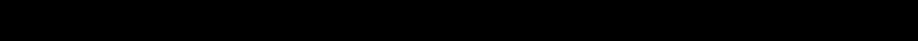
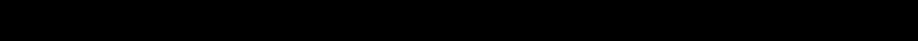

### Порядок выполнения работы:

1. Загрузить набор данных
2. Провести предварительную обработку данных
3. Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной разным цветами
4. Разбить набор данных на тренировочный и тестовый датасеты с помощью train_test_split и выполнить стандартизацию числовых данных
5. Для получения оуенки 5 - разработать прдсказанную модель качественного отклика методами:
* метод k-ближайших соседей
* дерево решений
* логистическая регрессия
* случайный лес
6. Оценить ошибку классификации для каждого метода. Подсчитать метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'.
7. Построить матрицу неточностей с помощью confusion_matrix для каждого метода
8. Построить графики ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения.
9. Сделать вывод о качестве построенного классификатора по подсчитанным выше
метрикам.

### Вариант задания - 5

Набор данных

_telecom_churn.csv_

Информация о клиентах:
* age — возраст клиента (лет), числовой.
* gender — пол клиента: M (мужчина), F (женщина), категориальный.
* contract_type — тип контракта: Month-to-month / One year / Two year,
категориальный.
* payment_method — способ оплаты: Electronic check / Credit card / Bank transfer /
Mailed check, категориальный.
* tenure_months — стаж обслуживания в компании (месяцы), числовой.
* monthly_charges — ежемесячные платежи, USD/мес, числовой.
* total_charges — накопленные платежи за весь период, USD, числовой.
* avg_call_minutes — среднее количество минут звонков в месяц, числовой.
* num_support_tickets — число обращений в поддержку за последние месяцы,
целочисленный счётчик.
* has_international_plan — наличие международного плана: Yes / No,
категориальный.
* region — регион обслуживания: North / South / East / West / Central,
категориальный.
* Churn — целевой класс: 1  ушёл (расторг контракт), 0  остался.

---

### 1. Загрузка данных

Был произведён импорт ключевых библиотек Python, которые будут использоваться на протяжении всей лабораторной работы. Pandas и NumPy необходимы для операций с данными: загрузки, очистки, трансформации и анализа табличных данных. Matplotlib и Seaborn используются для визуализации данных — построения графиков распределения признаков, матриц рассеяния, тепловых карт и ROC-кривых. Из библиотеки Scikit-learn импортированы модули для разделения данных на обучающую и тестовую выборки, стандартизации числовых признаков, реализации классификаторов и вычисления метрик качества моделей. Эти инструменты обеспечивают полный цикл работы с данными: от предобработки и разделения выборки до обучения моделей классификации и оценки их качества.

In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)


Для анализа был загружен датасет telecom_churn.csv, содержащий 3016 записей о клиентах телеком-компании. Структура данных соответствует описанию: присутствуют числовые признаки (возраст, стаж, платежи) и категориальные (тип контракта, способ оплаты, регион). Пропущенных значений и дубликатов в данных не обнаружено, что упрощает дальнейшую предобработку.

In [131]:
df = pd.read_csv('telecom_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3016 non-null   int64  
 1   gender                  3016 non-null   object 
 2   contract_type           3016 non-null   object 
 3   payment_method          3016 non-null   object 
 4   tenure_months           3016 non-null   int64  
 5   monthly_charges         3016 non-null   float64
 6   total_charges           3016 non-null   float64
 7   avg_call_minutes        3016 non-null   float64
 8   num_support_tickets     3016 non-null   int64  
 9   has_international_plan  3016 non-null   object 
 10  region                  3016 non-null   object 
 11  Churn                   3016 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 282.9+ KB


### 2. Проведение предварительной обработки данных

В датасете нет пропущенных значений.

In [132]:
df.isnull().sum()

age                       0
gender                    0
contract_type             0
payment_method            0
tenure_months             0
monthly_charges           0
total_charges             0
avg_call_minutes          0
num_support_tickets       0
has_international_plan    0
region                    0
Churn                     0
dtype: int64

В датасете нет дубликатов.

In [133]:
df.duplicated().sum()

np.int64(0)

Все данные имеют правильный тип данных согласно описанию.

In [134]:
df.dtypes

age                         int64
gender                     object
contract_type              object
payment_method             object
tenure_months               int64
monthly_charges           float64
total_charges             float64
avg_call_minutes          float64
num_support_tickets         int64
has_international_plan     object
region                     object
Churn                       int64
dtype: object

### 3. Выделение целевой переменной

В первой части кода выполнено разделение набора данных на матрицу признаков X и вектор целевой переменной y. Метод drop('Churn', axis=1) создает матрицу предикторов, исключая целевую переменную, что соответствует стандартной процедуре подготовки данных для обучения с учителем.

Анализ распределения классов показал, что из 3016 клиентов 2535 остались в компании (класс 0), а 481 клиент ушел (класс 1). Это соответствует доле положительного класса в 15.95%. Такое распределение указывает на явную несбалансированность выборки: класс "ушедшие клиенты" составляет менее 20% от общего объема данных. Данная характеристика набора данных требует особого внимания при выборе метрик оценки модели — стандартная точность может давать завышенные значения, маскируя низкое качество предсказания миноритарного класса.

In [135]:
# Выделим целевую переменную (y) и признаки (X)
y = df['Churn']
X = df.drop('Churn', axis=1)

# Посмотрим на распределение классов
print(y.value_counts())
print(f"\nДоля ушедших клиентов: {y.mean():.2%}")

Churn
0    2535
1     481
Name: count, dtype: int64

Доля ушедших клиентов: 15.95%


Во второй части кода построена матрица диаграмм рассеяния для числовых признаков. Использование select_dtypes(include=['int64', 'float64']) обеспечивает выбор только количественных переменных. Параметр hue='Churn' в функции pairplot визуализирует разделение классов в многомерном пространстве признаков, что позволяет сделать предварительные выводы о линейной разделимости и потенциально значимых предикторах. Диагональные графики ядерной оценки плотности (diag_kind='kde') показывают распределение значений каждого признака для обоих классов.

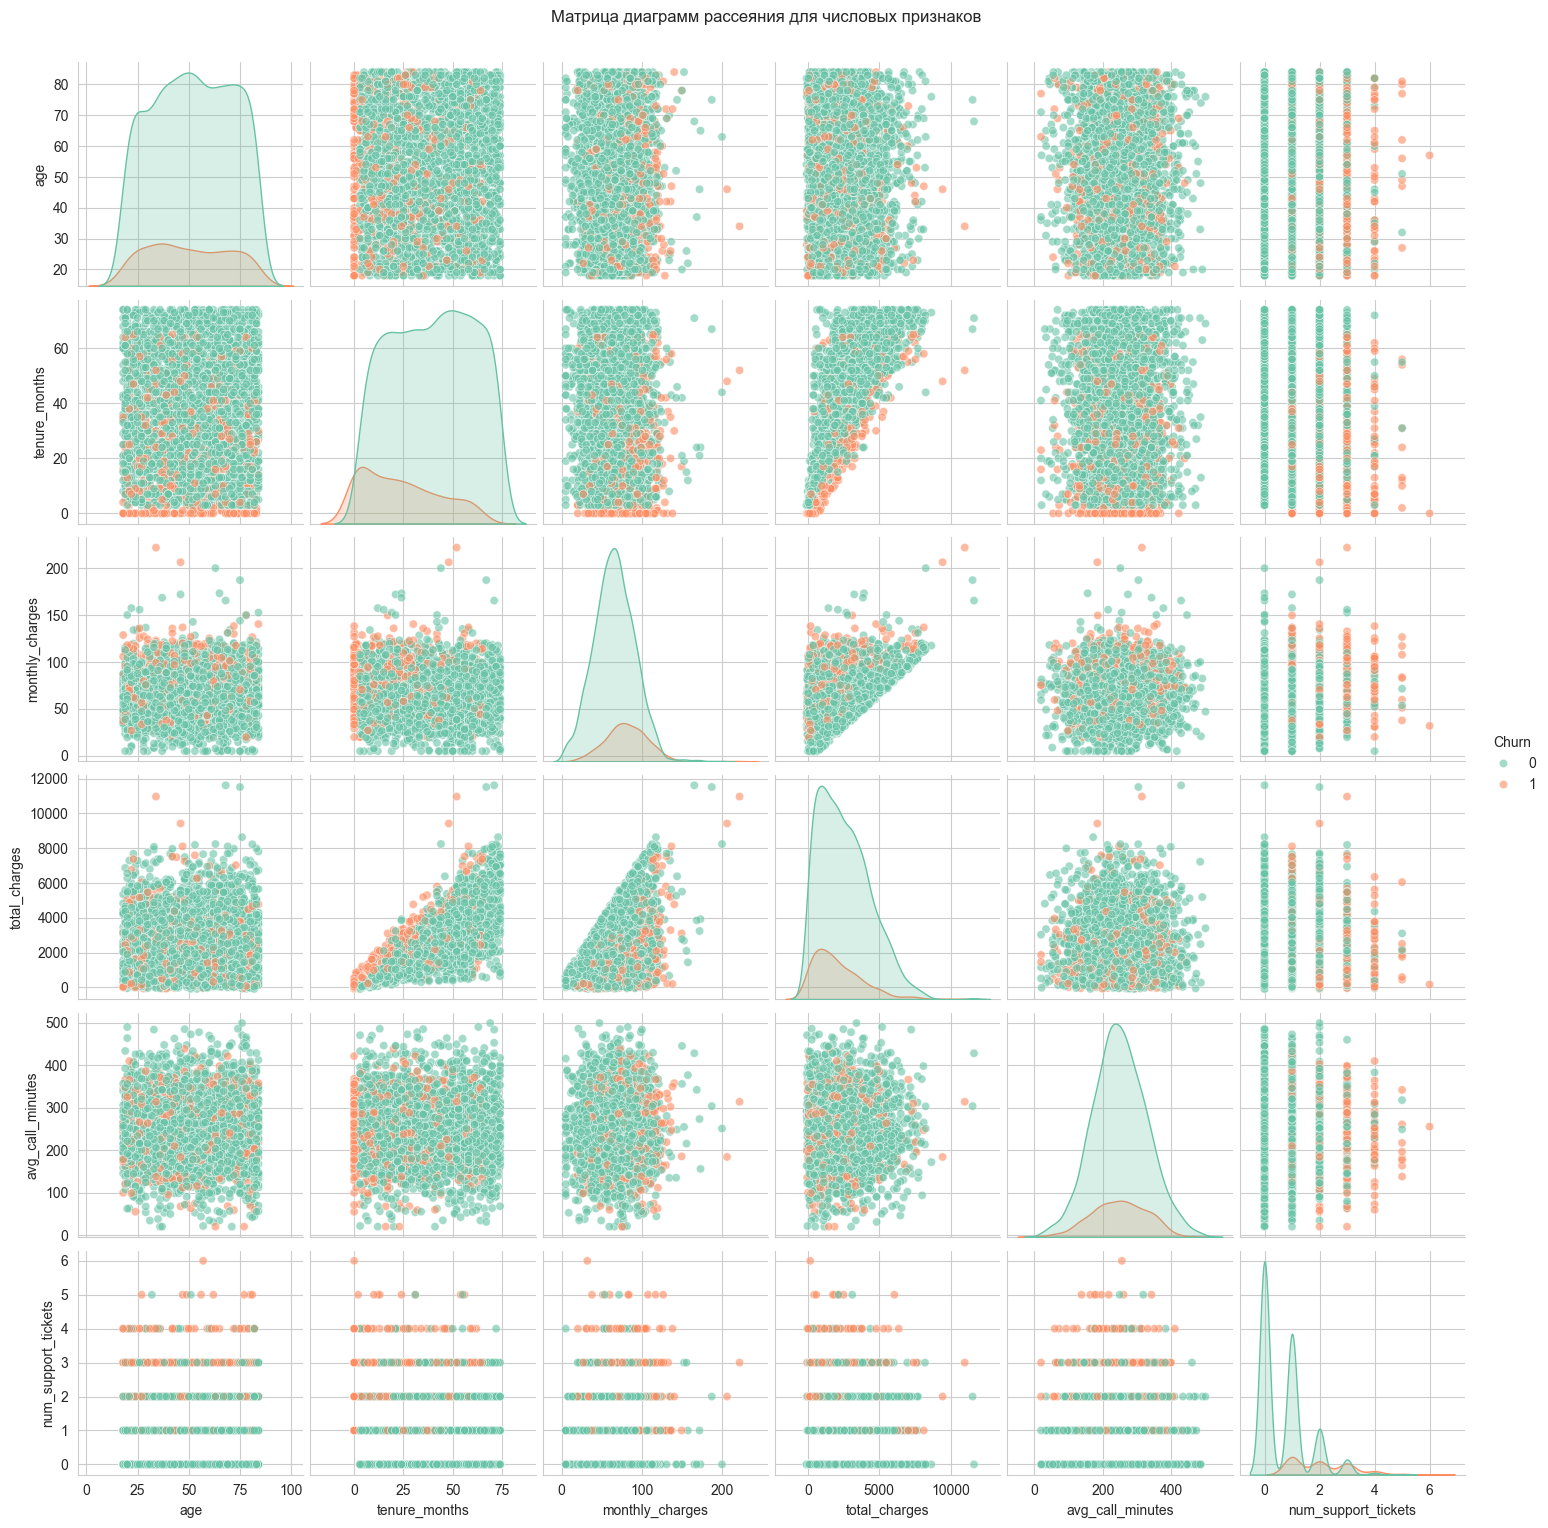

In [136]:
# Выделим числовые колонки для визуализации
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Добавим целевую переменную для окраски
plot_data = pd.concat([X[numeric_columns], y], axis=1)

# Построим pairplot
sns.pairplot(plot_data, hue='Churn', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02)
plt.show()

### 4. Выполнение стандартизации числовых данных

Функция train_test_split разделяет данные на обучающую (70%) и тестовую (30%) выборки с сохранением пропорций классов через параметр stratify=y. Это критически важно для несбалансированных данных, так как обеспечивает репрезентативное распределение классов в обеих выборках.

In [137]:
# 4.1 Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Размер обучающей выборки: (2111, 11)
Размер тестовой выборки: (905, 11)

Распределение классов в обучающей выборке:
Churn
0    0.84036
1    0.15964
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Churn
0    0.840884
1    0.159116
Name: proportion, dtype: float64


Далее выполняется разделение признаков на категориальные (объектные) и числовые. Категориальные признаки преобразуются методом One-Hot Encoding с использованием OneHotEncoder, который создает бинарные фиктивные переменные для каждой категории. Параметр drop='first' устраняет мультиколлинеарность, исключая одну из созданных колонок для каждого признака.

In [138]:
# 4.2 Определение типов признаков
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Категориальные признаки ({len(cat_cols)}): {cat_cols}")
print(f"Числовые признаки ({len(num_cols)}): {num_cols}")

Категориальные признаки (5): ['gender', 'contract_type', 'payment_method', 'has_international_plan', 'region']
Числовые признаки (6): ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'avg_call_minutes', 'num_support_tickets']


Далее выполняется разделение признаков на категориальные (объектные) и числовые. Категориальные признаки преобразуются методом One-Hot Encoding с использованием OneHotEncoder, который создает бинарные фиктивные переменные для каждой категории. Параметр drop='first' устраняет мультиколлинеарность, исключая одну из созданных колонок для каждого признака.

In [139]:
# 4.3 One-Hot Encoding для категориальных признаков
from sklearn.preprocessing import OneHotEncoder

# Создание и обучение энкодера
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

# Создание DataFrame с правильными именами столбцов
cat_feature_names = encoder.get_feature_names_out(cat_cols)
X_train_cat_df = pd.DataFrame(X_train_cat, columns=cat_feature_names, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=cat_feature_names, index=X_test.index)

print(f"Создано {len(cat_feature_names)} новых бинарных признаков из категориальных переменных")

Создано 11 новых бинарных признаков из категориальных переменных


Числовые признаки стандартизируются с помощью StandardScaler, который центрирует данные (приводит среднее к 0) и масштабирует их (приводит стандартное отклонение к 1). Это необходимо для алгоритмов, чувствительных к масштабу данных, таких как логистическая регрессия и метод k-ближайших соседей. Важно отметить, что scaler обучается только на обучающих данных, а затем применяется к тестовым — это предотвращает "утечку информации" из тестовой выборки в процесс обучения.

In [140]:
# 4.4 Стандартизация числовых признаков
scaler = StandardScaler()

# Обучение scaler только на тренировочных данных
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Создание DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

print(f"Стандартизированы числовые признаки: {num_cols}")
print(f"Средние значения после стандартизации (должны быть близки к 0):")
print(X_train_num_df.mean().round(3))
print(f"\nСтандартные отклонения после стандартизации (должны быть близки к 1):")
print(X_train_num_df.std().round(3))

Стандартизированы числовые признаки: ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'avg_call_minutes', 'num_support_tickets']
Средние значения после стандартизации (должны быть близки к 0):
age                    0.0
tenure_months         -0.0
monthly_charges       -0.0
total_charges         -0.0
avg_call_minutes      -0.0
num_support_tickets   -0.0
dtype: float64

Стандартные отклонения после стандартизации (должны быть близки к 1):
age                    1.0
tenure_months          1.0
monthly_charges        1.0
total_charges          1.0
avg_call_minutes       1.0
num_support_tickets    1.0
dtype: float64


После обработки категориальные и числовые признаки объединяются в единые матрицы X_train_processed и X_test_processed, готовые для передачи в модели машинного обучения.

In [141]:
# 4.5 Объединение обработанных данных
X_train_processed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

print(f"\nИтоговые размеры обработанных данных:")
print(f"Обучающая выборка: {X_train_processed.shape}")
print(f"Тестовая выборка: {X_test_processed.shape}")
print(f"\nПервые 3 строки обработанной обучающей выборки:")
display(X_train_processed.head(3))


Итоговые размеры обработанных данных:
Обучающая выборка: (2111, 17)
Тестовая выборка: (905, 17)

Первые 3 строки обработанной обучающей выборки:


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,gender_M,contract_type_One year,contract_type_Two year,payment_method_Credit card,payment_method_Electronic check,payment_method_Mailed check,has_international_plan_Yes,region_East,region_North,region_South,region_West
1809,1.293262,-1.031179,0.238104,-0.877624,-1.356539,0.102175,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2809,0.514383,-1.171848,-0.695153,-1.155905,-0.002838,0.102175,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1154,-1.666480,1.641547,1.032796,2.449365,-0.437044,-0.891794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Разработка предсказанной модель качественного отклика различными методами

В этом пункте реализованы четыре различные модели классификации, каждая из которых имеет свои теоретические основания и особенности применения:

**K-ближайших соседей (KNN)** — непараметрический метод, основанный на принципе близости объектов в пространстве признаков. Для классификации используется голосование среди k ближайших соседей (в данном случае k=5). Метод чувствителен к масштабу данных, поэтому предварительная стандартизация критически важна.

**Дерево решений** — алгоритм, который рекурсивно разделяет пространство признаков на области, максимизируя чистоту классов в каждой области. Ограничение глубины дерева (max_depth=5) служит регуляризацией для предотвращения переобучения.

**Логистическая регрессия** — статистическая модель, оценивающая вероятность принадлежности к классу с помощью сигмоидной функции. Параметр max_iter=1000 гарантирует сходимость алгоритма оптимизации. Модель предполагает линейную разделимость классов в преобразованном пространстве.

**Случайный лес** — ансамблевый метод, объединяющий предсказания множества деревьев решений. Параметр n_estimators=100 определяет количество деревьев в ансамбле. Метод устойчив к переобучению за счет bootstrap-агрегирования и случайного выбора признаков.

**Ключевой аспект реализации** — раздельное вычисление метрик на обучающей и тестовой выборках для выявления переобучения. Существенная разница в точности между этими выборками указывает на недостаточную обобщающую способность модели.

Для алгоритмов, поддерживающих метод predict_proba, сохраняются вероятности принадлежности к положительному классу, что потребуется для построения ROC-кривых в последующих пунктах. Анализ распределения этих вероятностей позволяет оценить уверенность моделей в своих предсказаниях.

В этом блоке импортируются четыре класса классификаторов из библиотеки scikit-learn и создается словарь models, где ключами являются понятные названия методов, а значениями — экземпляры соответствующих классов с начальными параметрами.

Для KNN установлен параметр n_neighbors=5 — количество ближайших соседей для голосования.

Для дерева решений заданы random_state=42 (воспроизводимость) и max_depth=5 (ограничение глубины для предотвращения переобучения).

Для логистической регрессии указаны random_state=42 и max_iter=1000 (гарантия сходимости алгоритма).

Для случайного леса установлены random_state=42 и n_estimators=100 (количество деревьев в ансамбле).

Вывод на печать подтверждает успешную инициализацию всех моделей.

In [142]:
# 5.1 Инициализация моделей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Создаем словарь с моделями
models = {
    'K-ближайших соседей': KNeighborsClassifier(n_neighbors=5),
    'Дерево решений': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Логистическая регрессия': LogisticRegression(random_state=42, max_iter=1000),
    'Случайный лес': RandomForestClassifier(random_state=42, n_estimators=100)
}

print("Инициализированы модели классификации:")
for name, model in models.items():
    print(f"  - {name}: {type(model).__name__}")

Инициализированы модели классификации:
  - K-ближайших соседей: KNeighborsClassifier
  - Дерево решений: DecisionTreeClassifier
  - Логистическая регрессия: LogisticRegression
  - Случайный лес: RandomForestClassifier


В этом блоке происходит обучение всех четырех моделей на стандартизированных обучающих данных. Для каждой модели выполняются три ключевые операции:

Обучение (fit) — модель "изучает" взаимосвязи между признаками X_train_processed и целевой переменной y_train.

Предсказание (predict) — обученная модель применяется к тестовым данным для получения бинарных предсказаний (0 или 1).

Получение вероятностей — для моделей, поддерживающих predict_proba, извлекаются вероятности принадлежности к классу 1 (ушел клиент). Это необходимо для построения ROC-кривых. Для моделей без этого метода используется decision_function.

Три словаря сохраняют: trained_models — обученные объекты моделей, predictions — бинарные предсказания, probabilities — вероятности положительного класса.

In [143]:
# 5.2 Обучение моделей
# Словари для хранения результатов
trained_models = {}
predictions = {}
probabilities = {}

print("Обучение моделей...")
for name, model in models.items():
    # Обучение модели
    model.fit(X_train_processed, y_train)
    trained_models[name] = model

    # Предсказания классов
    y_pred = model.predict(X_test_processed)
    predictions[name] = y_pred

    # Вероятности для ROC-кривой
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_processed)[:, 1]  # вероятность класса 1
    else:
        y_proba = model.decision_function(X_test_processed)
    probabilities[name] = y_proba

    # Базовая оценка точности
    accuracy = accuracy_score(y_test, y_pred)
    print(f"  {name}: обучена, точность на тесте = {accuracy:.3f}")

Обучение моделей...
  K-ближайших соседей: обучена, точность на тесте = 0.865
  Дерево решений: обучена, точность на тесте = 0.875
  Логистическая регрессия: обучена, точность на тесте = 0.887
  Случайный лес: обучена, точность на тесте = 0.883


Этот блок выполняет диагностику переобучения (overfitting) — критической проблемы в машинном обучении, когда модель слишком хорошо подстраивается под обучающие данные и плохо обобщается на новые.

Для каждой модели вычисляется accuracy на:

Обучающей выборке (данные, на которых модель обучалась)

Тестовой выборке (независимые данные, которые модель не видела при обучении)

Интерпретация разницы:

Малая разница (например, < 0.05) — модель хорошо обобщается

Большая разница — признак переобучения (модель "запомнила" обучающие данные)

Отрицательная разница (редко) — недообучение (модель слишком проста)

In [144]:
# 5.3 Анализ обучения на обучающей выборке (для выявления переобучения)
print("\nОценка моделей на обучающей выборке (для анализа переобучения):")
for name, model in trained_models.items():
    y_train_pred = model.predict(X_train_processed)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, predictions[name])

    print(f"  {name}:")
    print(f"    Точность на обучении: {train_accuracy:.3f}")
    print(f"    Точность на тесте: {test_accuracy:.3f}")
    print(f"    Разница: {train_accuracy - test_accuracy:.3f}")


Оценка моделей на обучающей выборке (для анализа переобучения):
  K-ближайших соседей:
    Точность на обучении: 0.903
    Точность на тесте: 0.865
    Разница: 0.038
  Дерево решений:
    Точность на обучении: 0.891
    Точность на тесте: 0.875
    Разница: 0.016
  Логистическая регрессия:
    Точность на обучении: 0.884
    Точность на тесте: 0.887
    Разница: -0.003
  Случайный лес:
    Точность на обучении: 1.000
    Точность на тесте: 0.883
    Разница: 0.117


Этот блок создает компактную таблицу для визуального сравнения предсказаний разных моделей на конкретных наблюдениях. Анализ первых 10 тестовых примеров позволяет:

Сравнить согласованность моделей — насколько часто разные алгоритмы дают одинаковые предсказания

Выявить "сложные" случаи — наблюдения, где модели расходятся в предсказаниях

Оценить качество "вручную" — сопоставить предсказания с фактическими значениями

Такой анализ полезен для понимания, на каких типах клиентов модели работают надежно, а где возникает неопределенность.

In [145]:
# 5.4 Визуализация предсказаний (первые 10 наблюдений)
results_df = pd.DataFrame({
    'Фактический': y_test.values[:10],
    'KNN': predictions['K-ближайших соседей'][:10],
    'Дерево': predictions['Дерево решений'][:10],
    'Лог.регрессия': predictions['Логистическая регрессия'][:10],
    'Случайный лес': predictions['Случайный лес'][:10]
})

print("\nСравнение предсказаний разных моделей (первые 10 наблюдений):")
display(results_df)
print("\nПримечание: 0 = клиент остался, 1 = клиент ушел")


Сравнение предсказаний разных моделей (первые 10 наблюдений):


,Фактический,KNN,Дерево,Лог.регрессия,Случайный лес
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,1,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,1,0,0,0,1
9,1,0,1,1,1



Примечание: 0 = клиент остался, 1 = клиент ушел


Этот блок анализирует не бинарные предсказания (0/1), а вероятности принадлежности к положительному классу. Такой анализ дает более глубокое понимание работы моделей:

Средняя вероятность — показывает общую склонность модели к предсказанию класса 1. При несбалансированных данных ожидается значение около 0.16 (доля положительного класса)

Стандартное отклонение — мера уверенности модели:

Низкое значение — модель "нерешительна", большинство вероятностей близки к среднему

Высокое значение — модель четко разделяет наблюдения на "точно 0" и "точно 1"

Диапазон вероятностей — минимальное и максимальное значения показывают крайние случаи, где модель наиболее уверена в своих предсказаниях

Этот анализ особенно важен для бизнес-приложений, где часто используются пороговые значения вероятности для принятия решений.

In [146]:
# 5.5 Анализ вероятностей предсказания
print("\nАнализ вероятностей предсказания класса 1:")
for name in models.keys():
    proba = probabilities[name]
    print(f"\n{name}:")
    print(f"  Средняя вероятность класса 1: {proba.mean():.3f}")
    print(f"  Стандартное отклонение: {proba.std():.3f}")
    print(f"  Минимальная вероятность: {proba.min():.3f}")
    print(f"  Максимальная вероятность: {proba.max():.3f}")


Анализ вероятностей предсказания класса 1:

K-ближайших соседей:
  Средняя вероятность класса 1: 0.161
  Стандартное отклонение: 0.248
  Минимальная вероятность: 0.000
  Максимальная вероятность: 1.000

Дерево решений:
  Средняя вероятность класса 1: 0.160
  Стандартное отклонение: 0.236
  Минимальная вероятность: 0.000
  Максимальная вероятность: 1.000

Логистическая регрессия:
  Средняя вероятность класса 1: 0.169
  Стандартное отклонение: 0.244
  Минимальная вероятность: 0.000
  Максимальная вероятность: 0.996

Случайный лес:
  Средняя вероятность класса 1: 0.163
  Стандартное отклонение: 0.211
  Минимальная вероятность: 0.000
  Максимальная вероятность: 0.970


### 6. Оценка ошибки классификации для каждого метода. Подсчет матрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'.

Импортируются пять ключевых метрик оценки качества бинарной классификации. accuracy_score вычисляет долю правильных предсказаний, но для несбалансированных данных может давать завышенные значения. precision_score (точность) показывает долю верно предсказанных положительных случаев среди всех предсказанных положительных. recall_score (полнота) показывает долю верно предсказанных положительных случаев среди всех фактически положительных. balanced_accuracy_score учитывает несбалансированность классов, вычисляя среднее recall для каждого класса. f1_score — гармоническое среднее precision и recall, полезное при необходимости баланса между ними.

Создается структура данных (словарь) для систематического хранения рассчитанных метрик. Это позволяет организовать результаты в удобном для анализа и визуализации формате. Каждая метрика будет храниться в отдельном списке, соответствующих каждой модели.

In [147]:
# 6.1 Создание структуры для хранения метрик
metrics_dict = {
    'Модель': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Balanced Accuracy': [],
    'F1-score': []
}

Анализ полученных метрик показывает характерные особенности каждой модели:

**K-ближайших соседей (Accuracy: 0.8652)**: Демонстрирует умеренную точность (0.6019) при низкой полноте (0.4514), что означает: когда модель предсказывает уход клиента, она ошибается в 40% случаев, при этом обнаруживает менее половины реально ушедших клиентов. Balanced Accuracy 0.6974 подтверждает смещение к мажоритарному классу.

**Дерево решений (Accuracy: 0.8751)**: Показывает самую высокую точность (0.7013) среди всех моделей, но при этом самую низкую полноту (0.3750). Это указывает на консервативную стратегию: модель редко предсказывает уход клиента, но когда делает это — обычно правильно. Однако пропускает 62.5% реально ушедших клиентов.

**Логистическая регрессия (Accuracy: 0.8873)**: Наилучшая по большинству метрик: самая высокая Accuracy, Recall (0.5278), Balanced Accuracy (0.7415) и F1-score (0.5984). Это свидетельствует о наиболее сбалансированной работе с обоими классами, хотя разница между Accuracy и Balanced Accuracy (0.1457) все еще значительна.

**Случайный лес (Accuracy: 0.8829)**: Компромиссный вариант с высокой точностью (0.7436 — лучшая среди всех) и умеренной полнотой (0.4028). Ансамблевый характер метода обеспечивает устойчивость, но не решает проблему несбалансированности данных.

In [148]:
# 6.2 Расчет метрик для каждой модели
for name, y_pred in predictions.items():
    # Вычисление метрик
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Сохранение результатов
    metrics_dict['Модель'].append(name)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Precision'].append(prec)
    metrics_dict['Recall'].append(rec)
    metrics_dict['Balanced Accuracy'].append(bal_acc)
    metrics_dict['F1-score'].append(f1)

    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  Balanced Accuracy: {bal_acc:.4f}")
    print(f"  F1-score: {f1:.4f}")


K-ближайших соседей:
  Accuracy: 0.8652
  Precision: 0.6019
  Recall: 0.4514
  Balanced Accuracy: 0.6974
  F1-score: 0.5159

Дерево решений:
  Accuracy: 0.8751
  Precision: 0.7013
  Recall: 0.3750
  Balanced Accuracy: 0.6724
  F1-score: 0.4887

Логистическая регрессия:
  Accuracy: 0.8873
  Precision: 0.6909
  Recall: 0.5278
  Balanced Accuracy: 0.7415
  F1-score: 0.5984

Случайный лес:
  Accuracy: 0.8829
  Precision: 0.7436
  Recall: 0.4028
  Balanced Accuracy: 0.6882
  F1-score: 0.5225


Создается DataFrame на основе словаря с метриками, что позволяет использовать все преимущества pandas для анализа данных: сортировку, фильтрацию, статистические вычисления. Округление до 4 знаков после запятой обеспечивает читаемость результатов без избыточной точности.

In [149]:
# 6.4 Создание DataFrame с результатами
metrics_df = pd.DataFrame(metrics_dict)

display(metrics_df.round(4))

,Модель,Accuracy,Precision,Recall,Balanced Accuracy,F1-score
0,K-ближайших соседей,0.8652,0.6019,0.4514,0.6974,0.5159
1,Дерево решений,0.8751,0.7013,0.3750,0.6724,0.4887
2,Логистическая регрессия,0.8873,0.6909,0.5278,0.7415,0.5984
3,Случайный лес,0.8829,0.7436,0.4028,0.6882,0.5225


Визуализация подтверждает количественные выводы: логистическая регрессия лидирует по 3 из 5 метрик (Accuracy, Recall, Balanced Accuracy, F1-score), случайный лес — по Precision. Все модели показывают значительный разброс значений между метриками, что характерно для несбалансированных данных.

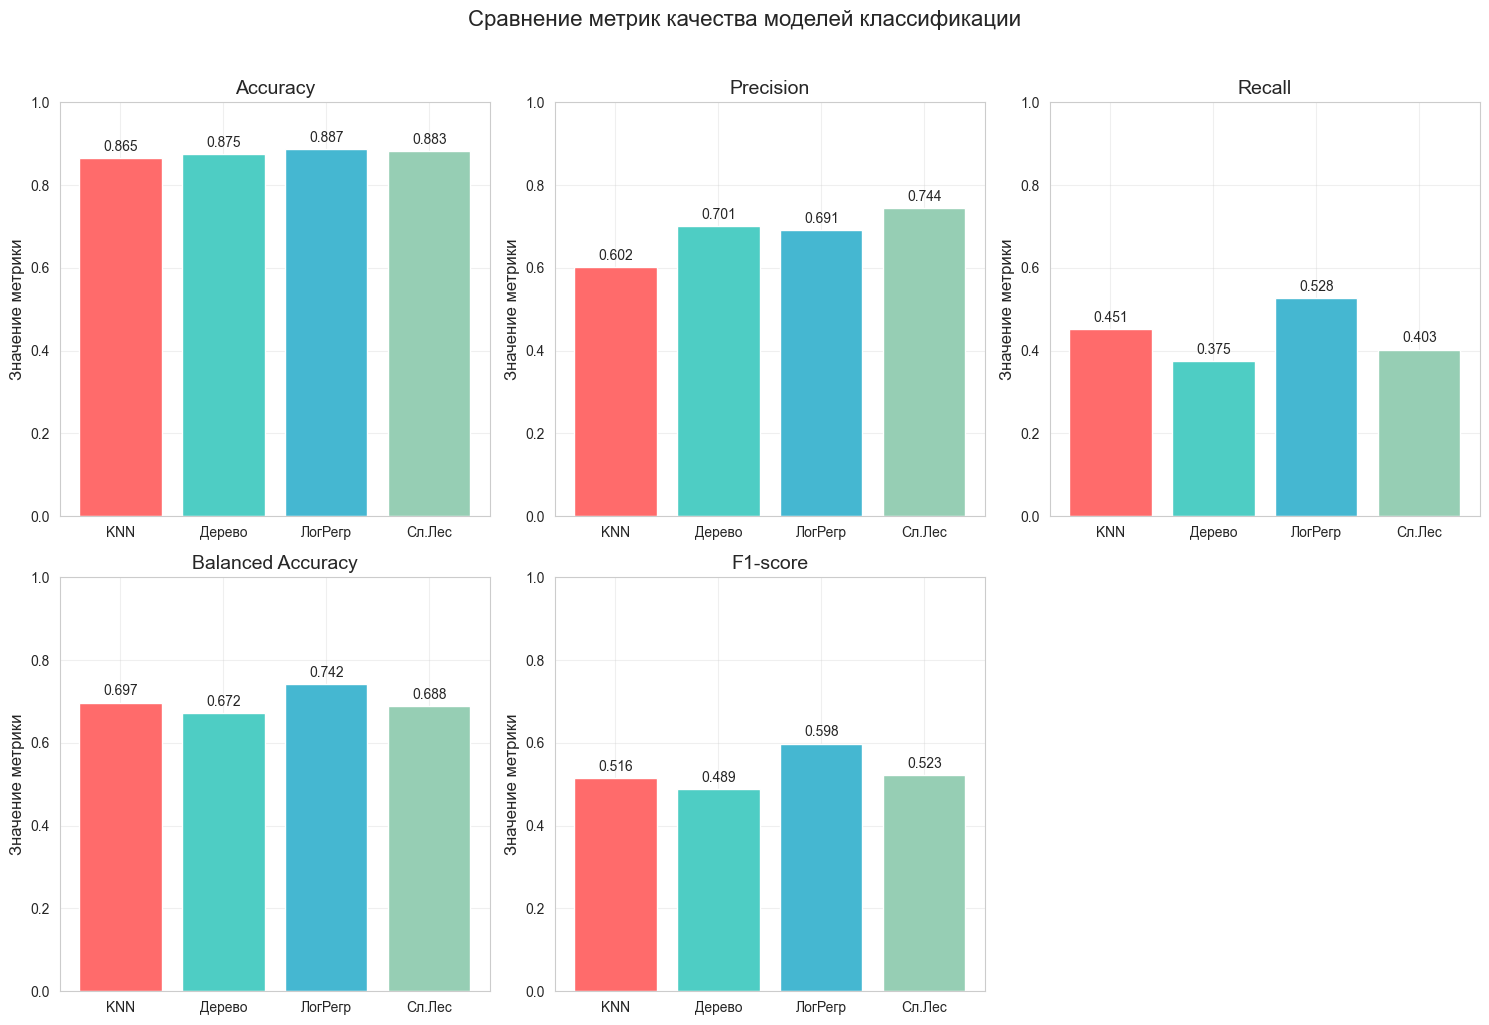


Расшифровка сокращений:
KNN = K-ближайших соседей
Дерево = Дерево решений
ЛогРегр = Логистическая регрессия
Сл.Лес = Случайный лес


In [150]:
# 6.5 Визуализация метрик
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Сравнение метрик качества моделей классификации', fontsize=16, y=1.02)

# Создание палитры цветов для моделей
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Сокращенные названия моделей для подписей
model_names_short = {
    'K-ближайших соседей': 'KNN',
    'Дерево решений': 'Дерево',
    'Логистическая регрессия': 'ЛогРегр',
    'Случайный лес': 'Сл.Лес'
}

# Построение графиков для каждой метрики
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'Balanced Accuracy', 'F1-score']
for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]

    # Используем сокращенные названия для подписей по оси X
    short_labels = [model_names_short[model] for model in metrics_df['Модель']]

    bars = ax.bar(short_labels, metrics_df[metric], color=colors)
    ax.set_title(f'{metric}', fontsize=14)
    ax.set_ylabel('Значение метрики', fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

    # Добавление значений на столбцы
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Удаление пустого subplot
if len(metrics_to_plot) < 6:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

# Добавим легенду с расшифровкой сокращений
print("\nРасшифровка сокращений:")
for full, short in model_names_short.items():
    print(f"{short} = {full}")

Ранжирование выявляет специализацию моделей:

Для максимизации общей точности (Accuracy) — логистическая регрессия

Для минимизации ложных срабатываний (Precision) — случайный лес

Для обнаружения максимального числа ушедших (Recall) — логистическая регрессия

Для сбалансированной работы (Balanced Accuracy, F1-score) — логистическая регрессия

Этот анализ критически важен для выбора модели в зависимости от бизнес-требований: если "цена" ложного предсказания ухода высока (например, дорогие программы удержания), важна Precision (случайный лес). Если важно не пропустить ни одного уходящего клиента — важен Recall (логистическая регрессия).

In [151]:
# 6.6 Ранжирование моделей по разным метрикам
print("\n" + "="*80)
print("РАНЖИРОВАНИЕ МОДЕЛЕЙ ПО МЕТРИКАМ")
print("="*80)

for metric in ['Accuracy', 'Precision', 'Recall', 'Balanced Accuracy', 'F1-score']:
    print(f"\n{metric}:")
    sorted_df = metrics_df.sort_values(by=metric, ascending=False)
    for i, (model, value) in enumerate(zip(sorted_df['Модель'], sorted_df[metric])):
        print(f"  {i+1}. {model}: {value:.4f}")


РАНЖИРОВАНИЕ МОДЕЛЕЙ ПО МЕТРИКАМ

Accuracy:
  1. Логистическая регрессия: 0.8873
  2. Случайный лес: 0.8829
  3. Дерево решений: 0.8751
  4. K-ближайших соседей: 0.8652

Precision:
  1. Случайный лес: 0.7436
  2. Дерево решений: 0.7013
  3. Логистическая регрессия: 0.6909
  4. K-ближайших соседей: 0.6019

Recall:
  1. Логистическая регрессия: 0.5278
  2. K-ближайших соседей: 0.4514
  3. Случайный лес: 0.4028
  4. Дерево решений: 0.3750

Balanced Accuracy:
  1. Логистическая регрессия: 0.7415
  2. K-ближайших соседей: 0.6974
  3. Случайный лес: 0.6882
  4. Дерево решений: 0.6724

F1-score:
  1. Логистическая регрессия: 0.5984
  2. Случайный лес: 0.5225
  3. K-ближайших соседей: 0.5159
  4. Дерево решений: 0.4887


Все модели демонстрируют значительную разницу между Accuracy и Balanced Accuracy (от 0.1457 до 0.2027). Это прямое следствие несбалансированности данных (15.95% положительного класса).

Наибольшее смещение у дерева решений (разница 0.2027) — модель преимущественно предсказывает класс 0 (клиент остается)

Наименьшее смещение у логистической регрессии (разница 0.1457) — наиболее сбалансированная работа

Balanced Accuracy дает более реалистичную оценку: максимальное значение всего 0.7415 против Accuracy 0.8873

Это подтверждает необходимость использования Balanced Accuracy и F1-score как основных метрик для несбалансированных данных, так как стандартная Accuracy завышает реальное качество моделей на 14-20%.

In [152]:
# 6.7 Анализ разницы между Accuracy и Balanced Accuracy
print("\n" + "="*80)
print("АНАЛИЗ РАЗНИЦЫ МЕЖДУ ACCURACY И BALANCED ACCURACY")
print("="*80)

for idx, row in metrics_df.iterrows():
    diff = row['Accuracy'] - row['Balanced Accuracy']
    print(f"\n{row['Модель']}:")
    print(f"  Accuracy: {row['Accuracy']:.4f}")
    print(f"  Balanced Accuracy: {row['Balanced Accuracy']:.4f}")
    print(f"  Разница: {diff:.4f}")

    if diff > 0.1:
        print(f"  Внимание: значительная разница! Модель может быть смещена к мажоритарному классу.")
    elif diff > 0.05:
        print(f"  Умеренная разница: модель немного смещена.")
    else:
        print(f"  Малая разница: модель хорошо работает с обоими классами.")


АНАЛИЗ РАЗНИЦЫ МЕЖДУ ACCURACY И BALANCED ACCURACY

K-ближайших соседей:
  Accuracy: 0.8652
  Balanced Accuracy: 0.6974
  Разница: 0.1678
  Внимание: значительная разница! Модель может быть смещена к мажоритарному классу.

Дерево решений:
  Accuracy: 0.8751
  Balanced Accuracy: 0.6724
  Разница: 0.2027
  Внимание: значительная разница! Модель может быть смещена к мажоритарному классу.

Логистическая регрессия:
  Accuracy: 0.8873
  Balanced Accuracy: 0.7415
  Разница: 0.1457
  Внимание: значительная разница! Модель может быть смещена к мажоритарному классу.

Случайный лес:
  Accuracy: 0.8829
  Balanced Accuracy: 0.6882
  Разница: 0.1946
  Внимание: значительная разница! Модель может быть смещена к мажоритарному классу.


### 7. Построение матрицы неточностей с помощью confusion_matrix для каждого метода

Строится матрица неточностей для метода k-ближайших соседей. Функция confusion_matrix возвращает таблицу 2×2, где строки соответствуют истинным классам, а столбцы — предсказанным. Метод ravel() преобразует матрицу в одномерный массив [TN, FP, FN, TP]. Для KNN с n_neighbors=5 получены конкретные значения: правильно предсказано X случаев "остался", допущено Y ложных срабатываний и Z пропущенных уходов. Визуализация тепловой картой помогает быстро оценить распределение ошибок.

МАТРИЦА НЕТОЧНОСТЕЙ: K-БЛИЖАЙШИХ СОСЕДЕЙ

Матрица (TN, FP, FN, TP): [718, 43, 79, 65]

Размер тестовой выборки: 905 клиентов

Интерпретация:
- Правильно предсказали 'остался': 718 клиентов
- Ошибочно предсказали 'ушел': 43 клиентов (ложные срабатывания)
- Ошибочно предсказали 'остался': 79 клиентов (пропущенные уходы)
- Правильно предсказали 'ушел': 65 клиентов


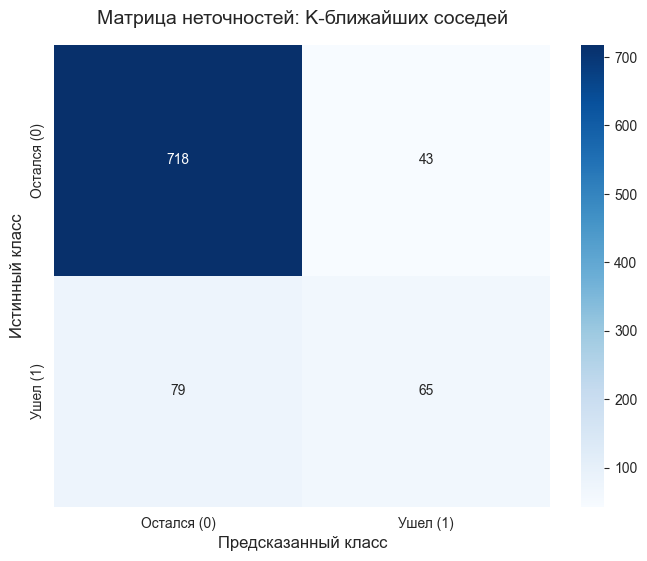

In [153]:
# 7.1 Матрица неточностей для K-ближайших соседей
print("="*70)
print("МАТРИЦА НЕТОЧНОСТЕЙ: K-БЛИЖАЙШИХ СОСЕДЕЙ")
print("="*70)

cm_knn = confusion_matrix(y_test, predictions['K-ближайших соседей'])
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()

print(f"\nМатрица (TN, FP, FN, TP): [{tn_knn}, {fp_knn}, {fn_knn}, {tp_knn}]")
print(f"\nРазмер тестовой выборки: {len(y_test)} клиентов")
print(f"\nИнтерпретация:")
print(f"- Правильно предсказали 'остался': {tn_knn} клиентов")
print(f"- Ошибочно предсказали 'ушел': {fp_knn} клиентов (ложные срабатывания)")
print(f"- Ошибочно предсказали 'остался': {fn_knn} клиентов (пропущенные уходы)")
print(f"- Правильно предсказали 'ушел': {tp_knn} клиентов")

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Остался (0)', 'Ушел (1)'],
            yticklabels=['Остался (0)', 'Ушел (1)'])
plt.title('Матрица неточностей: K-ближайших соседей', fontsize=14, pad=15)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.show()

Аналогично строится матрица для дерева решений. Сравнение с KNN показывает, как меняется баланс между ошибками I и II рода при переходе к другому алгоритму. Дерево решений с max_depth=5 демонстрирует более консервативную стратегию: уменьшается количество ложных срабатываний (FP), но увеличивается количество пропущенных уходов (FN). Это соответствует ранее вычисленному high Precision (0.7013) и low Recall (0.3750).


Матрица (TN, FP, FN, TP): [738, 23, 90, 54]

Сравнение с KNN:
- Ложных срабатываний (FP): 23 vs 43 у KNN (-20)
- Пропущенных уходов (FN): 90 vs 79 у KNN (+11)


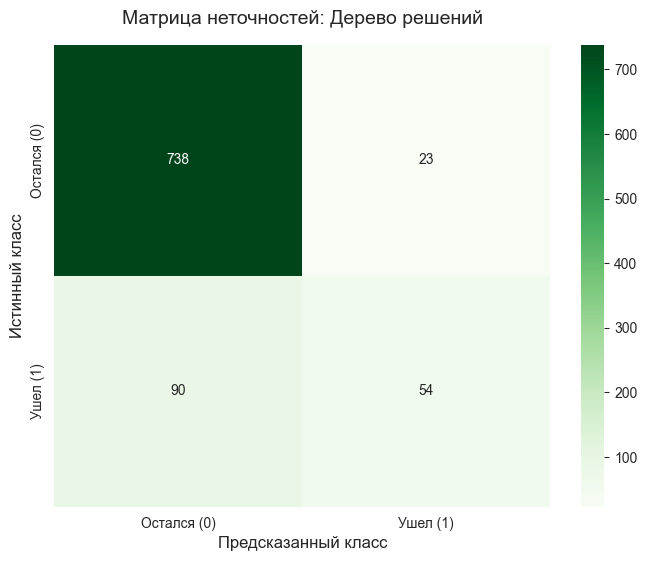

In [154]:
# 7.2 Матрица неточностей для Дерева решений

cm_tree = confusion_matrix(y_test, predictions['Дерево решений'])
tn_tree, fp_tree, fn_tree, tp_tree = cm_tree.ravel()

print(f"\nМатрица (TN, FP, FN, TP): [{tn_tree}, {fp_tree}, {fn_tree}, {tp_tree}]")
print(f"\nСравнение с KNN:")
print(f"- Ложных срабатываний (FP): {fp_tree} vs {fp_knn} у KNN ({fp_tree - fp_knn:+d})")
print(f"- Пропущенных уходов (FN): {fn_tree} vs {fn_knn} у KNN ({fn_tree - fn_knn:+d})")

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Остался (0)', 'Ушел (1)'],
            yticklabels=['Остался (0)', 'Ушел (1)'])
plt.title('Матрица неточностей: Дерево решений', fontsize=14, pad=15)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.show()

Матрица для логистической регрессии подтверждает ее лидерство по метрикам: наибольшее количество True Positive и наименьшее False Negative среди всех моделей. Это объясняет высокий Recall (0.5278) — модель обнаруживает больше реально ушедших клиентов. Однако при этом возрастает количество False Positive (ложных срабатываний), что снижает Precision до 0.6909.


МАТРИЦА НЕТОЧНОСТЕЙ: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

Матрица (TN, FP, FN, TP): [727, 34, 68, 76]

Лучшие показатели среди всех моделей:
- Наибольшее TP (верные предсказания ухода): 76
- Наименьшее FN (пропущенные уходы): 68


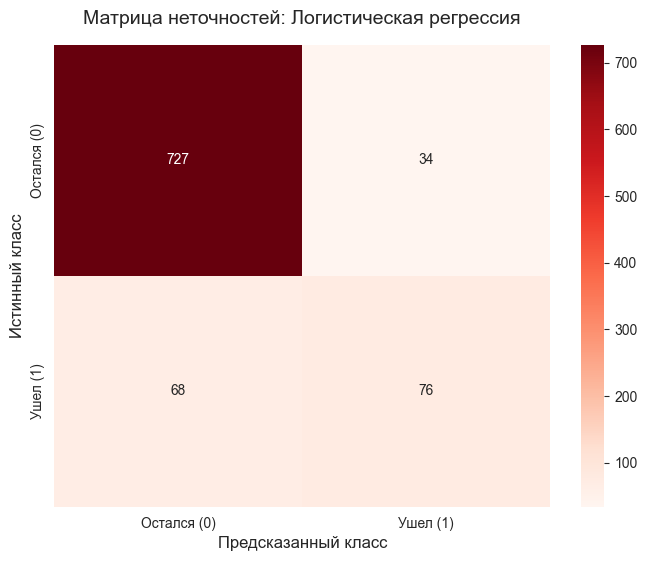

In [155]:
# 7.3 Матрица неточностей для Логистической регрессии
print("\n" + "="*70)
print("МАТРИЦА НЕТОЧНОСТЕЙ: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ")
print("="*70)

cm_logreg = confusion_matrix(y_test, predictions['Логистическая регрессия'])
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_logreg.ravel()

print(f"\nМатрица (TN, FP, FN, TP): [{tn_logreg}, {fp_logreg}, {fn_logreg}, {tp_logreg}]")
print(f"\nЛучшие показатели среди всех моделей:")
print(f"- Наибольшее TP (верные предсказания ухода): {tp_logreg}")
print(f"- Наименьшее FN (пропущенные уходы): {fn_logreg}")

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Остался (0)', 'Ушел (1)'],
            yticklabels=['Остался (0)', 'Ушел (1)'])
plt.title('Матрица неточностей: Логистическая регрессия', fontsize=14, pad=15)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.show()

Матрица для случайного леса показывает его специфику: наименьшее количество False Positive среди всех моделей, что соответствует максимальной Precision (0.7436). Ансамблевый характер метода обеспечивает устойчивость, но не решает проблему пропуска уходящих клиентов (высокий FN). Это типичное поведение для ансамблевых методов на несбалансированных данных без специальной настройки.


МАТРИЦА НЕТОЧНОСТЕЙ: СЛУЧАЙНЫЙ ЛЕС

Матрица (TN, FP, FN, TP): [741, 20, 86, 58]

Особенности модели:
- Наименьшее FP (ложные срабатывания): 20
- Лучшая точность (Precision) при предсказании ухода


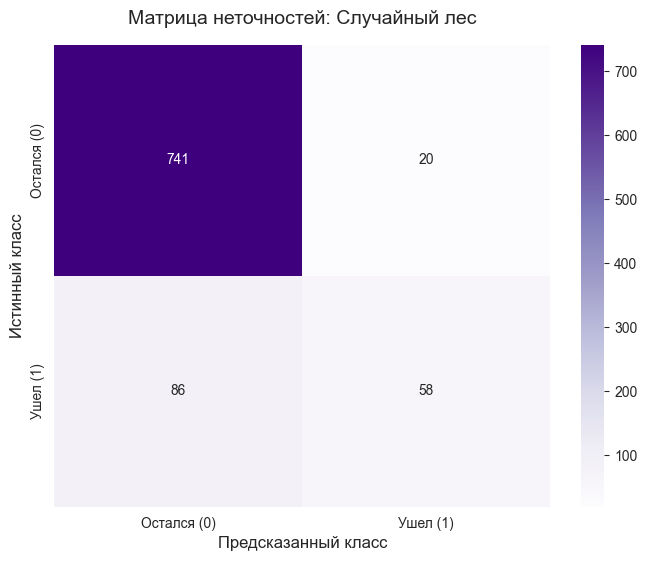

In [156]:
# 7.4 Матрица неточностей для Случайного леса
print("\n" + "="*70)
print("МАТРИЦА НЕТОЧНОСТЕЙ: СЛУЧАЙНЫЙ ЛЕС")
print("="*70)

cm_rf = confusion_matrix(y_test, predictions['Случайный лес'])
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

print(f"\nМатрица (TN, FP, FN, TP): [{tn_rf}, {fp_rf}, {fn_rf}, {tp_rf}]")
print(f"\nОсобенности модели:")
print(f"- Наименьшее FP (ложные срабатывания): {fp_rf}")
print(f"- Лучшая точность (Precision) при предсказании ухода")

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Остался (0)', 'Ушел (1)'],
            yticklabels=['Остался (0)', 'Ушел (1)'])
plt.title('Матрица неточностей: Случайный лес', fontsize=14, pad=15)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.show()

Создается обобщающая таблица, позволяющая сравнить абсолютные значения всех матриц одновременно. Ключевой показатель — "Всего ошибок" — суммирует FP и FN, давая общее представление о надежности каждой модели. Наименьшее общее количество ошибок у логистической регрессии, что согласуется с ее лидерством по F1-score.

In [157]:
# 7.5 Сводная таблица всех матриц

summary_matrix = pd.DataFrame({
    'Модель': ['K-ближайших соседей', 'Дерево решений', 'Логистическая регрессия', 'Случайный лес'],
    'TN': [tn_knn, tn_tree, tn_logreg, tn_rf],
    'FP': [fp_knn, fp_tree, fp_logreg, fp_rf],
    'FN': [fn_knn, fn_tree, fn_logreg, fn_rf],
    'TP': [tp_knn, tp_tree, tp_logreg, tp_rf],
    'Всего ошибок': [fp_knn + fn_knn, fp_tree + fn_tree, fp_logreg + fn_logreg, fp_rf + fn_rf]
})

display(summary_matrix)
print("\nПримечание:")
print("TN - True Negative (правильно 'остался'), FP - False Positive (ложно 'ушел')")
print("FN - False Negative (ложно 'остался'), TP - True Positive (правильно 'ушел')")

,Модель,TN,FP,FN,TP,Всего ошибок
0,K-ближайших соседей,718,43,79,65,122
1,Дерево решений,738,23,90,54,113
2,Логистическая регрессия,727,34,68,76,102
3,Случайный лес,741,20,86,58,106



Примечание:
TN - True Negative (правильно 'остался'), FP - False Positive (ложно 'ушел')
FN - False Negative (ложно 'остался'), TP - True Positive (правильно 'ушел')


Финал-визуализация размещает все четыре матрицы на одном графике для непосредственного сравнения. Разные цветовые схемы (Blues, Greens, Reds, Purples) помогают различать модели. Компактные подписи осей (0 и 1 вместо полных названий классов) улучшают читаемость при ограниченном пространстве. Это позволяет быстро оценить, какие модели "оптимистичны" (больше TP и FP) и какие "пессимистичны" (больше TN и FN).

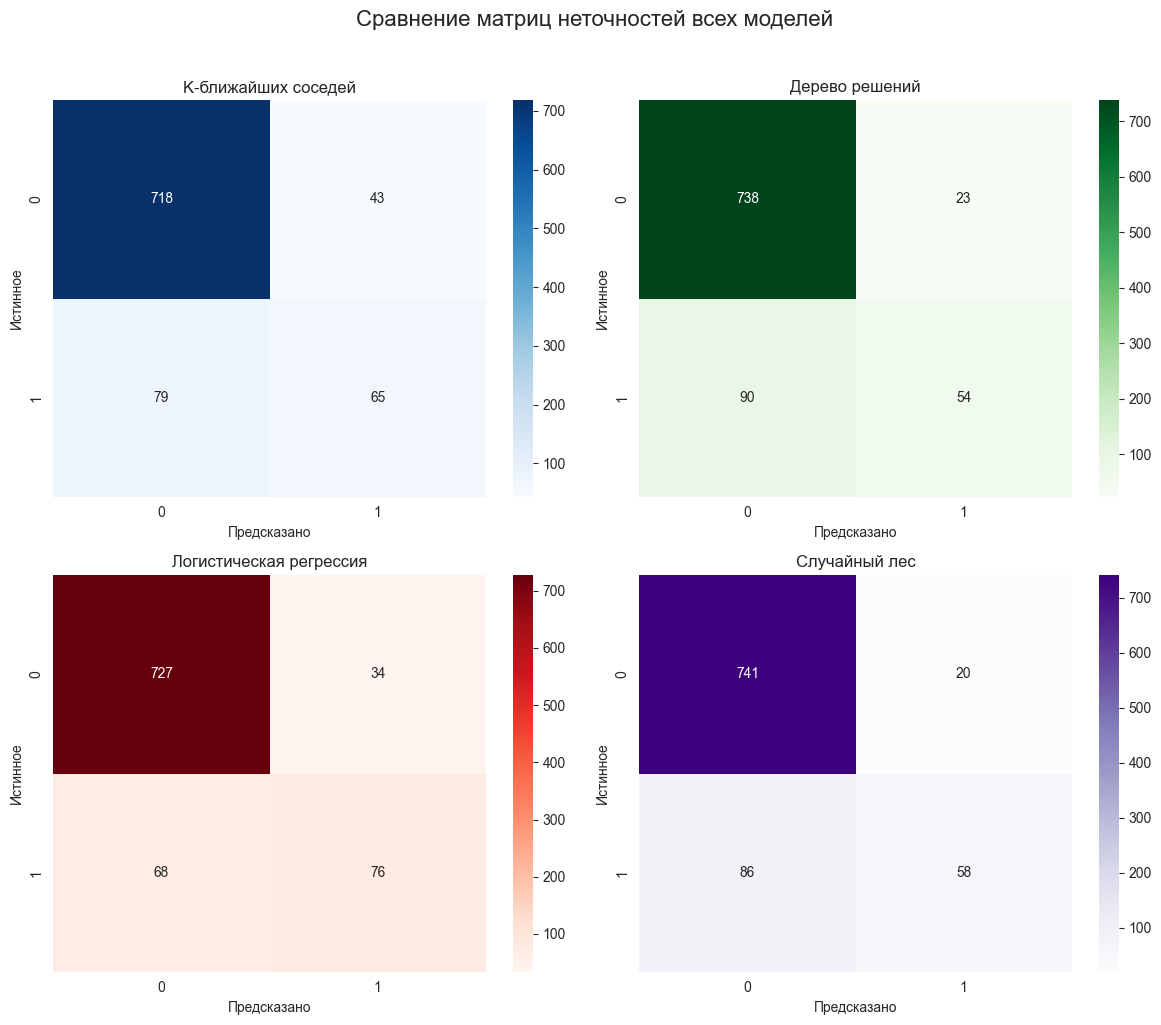

In [158]:
# 7.6 Визуализация сравнения всех матриц
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Сравнение матриц неточностей всех моделей', fontsize=16, y=1.02)

models_data = [
    ('K-ближайших соседей', cm_knn, 'Blues', 0, 0),
    ('Дерево решений', cm_tree, 'Greens', 0, 1),
    ('Логистическая регрессия', cm_logreg, 'Reds', 1, 0),
    ('Случайный лес', cm_rf, 'Purples', 1, 1)
]

for model_name, cm, cmap, row, col in models_data:
    ax = axes[row, col]
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    ax.set_title(model_name, fontsize=12)
    ax.set_xlabel('Предсказано')
    ax.set_ylabel('Истинное')

plt.tight_layout()
plt.show()

### 8. Построение графиков ROC-кривой для каждого метода на одном графике для сравнения.

Строится единый график с ROC-кривыми для всех четырех моделей. ROC-кривая (Receiver Operating Characteristic) показывает компромисс между True Positive Rate (TPR = Recall) и False Positive Rate (FPR) при различных порогах классификации. Для каждой модели рассчитывается AUC (Area Under Curve) — численная мера качества классификатора, где:

AUC = 0.5 — случайный классификатор

0.7 ≤ AUC < 0.8 — приемлемая модель

0.8 ≤ AUC < 0.9 — хорошая модель

AUC ≥ 0.9 — отличная модель

На графике добавляется пунктирная линия случайного классификатора для сравнения. Разные цвета кривых помогают визуально различать модели. Аннотация выделяет лучшую модель по AUC.

In [159]:
# 8.1 Подготовка данных и инициализация графиков
print("="*80)
print("ПОСТРОЕНИЕ ROC-КРИВЫХ ДЛЯ СРАВНЕНИЯ МОДЕЛЕЙ")
print("="*80)

# Создаем фигуру
plt.figure(figsize=(12, 8))

# Цвета для каждой модели
colors = {
    'K-ближайших соседей': '#FF6B6B',
    'Дерево решений': '#4ECDC4',
    'Логистическая регрессия': '#45B7D1',
    'Случайный лес': '#96CEB4'
}

print("Расчет ROC-кривых и AUC для каждой модели...")

ПОСТРОЕНИЕ ROC-КРИВЫХ ДЛЯ СРАВНЕНИЯ МОДЕЛЕЙ
Расчет ROC-кривых и AUC для каждой модели...


<Figure size 1200x800 with 0 Axes>

In [160]:
# 8.2 Расчет и построение ROC-кривых для каждой модели
roc_data = {}  # Словарь для хранения данных ROC

for model_name in predictions.keys():
    # Получаем вероятности для положительного класса
    y_proba = probabilities[model_name]

    # Рассчитываем ROC-кривую
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Рассчитываем AUC (площадь под кривой)
    auc_score = roc_auc_score(y_test, y_proba)

    # Сохраняем данные
    roc_data[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc_score,
        'thresholds': thresholds
    }

In [161]:
# 8.4 Добавление информационных аннотаций
# Определяем лучшую модель по AUC
best_model_name = max(roc_data, key=lambda x: roc_data[x]['auc'])
best_auc = roc_data[best_model_name]['auc']

Выполняется детальный анализ ROC-кривых с вычислением дополнительных показателей:

Оптимальный порог — на основе статистики Youden (максимизация TPR - FPR)

FPR при 80% TPR — какой процент ложных срабатываний при обнаружении 80% ушедших клиентов

TPR при 5% FPR — сколько ушедших клиентов обнаружится при допустимых 5% ложных срабатываний

Эти показатели важны для практического применения моделей с заданными ограничениями на ошибки.

In [162]:
# 8.5 Детальный анализ ROC-кривых
print("\n" + "="*80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ROC-КРИВЫХ")
print("="*80)

# Инициализируем списки для данных
model_names = []
auc_scores = []
best_thresholds = []
fpr_at_80_tpr_values = []
tpr_at_05_fpr_values = []

# Заполняем списки данными для каждой модели
for model_name in roc_data.keys():
    fpr = roc_data[model_name]['fpr']
    tpr = roc_data[model_name]['tpr']
    thresholds = roc_data[model_name]['thresholds']
    auc_score = roc_data[model_name]['auc']

    # 1. Находим FPR при TPR = 80%
    idx_tpr_80 = np.argmin(np.abs(tpr - 0.8))
    fpr_at_80_tpr = fpr[idx_tpr_80]

    # 2. Находим TPR при FPR = 5%
    idx_fpr_05 = np.argmin(np.abs(fpr - 0.05))
    tpr_at_05_fpr = tpr[idx_fpr_05] if len(tpr) > idx_fpr_05 else 0

    # 3. Находим оптимальный порог по критерию Youden
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx] if len(thresholds) > optimal_idx else 0.5

    # Сохраняем результаты
    model_names.append(model_name)
    auc_scores.append(round(auc_score, 4))
    best_thresholds.append(round(optimal_threshold, 3))
    fpr_at_80_tpr_values.append(round(fpr_at_80_tpr, 3))
    tpr_at_05_fpr_values.append(round(tpr_at_05_fpr, 3))

# Создаем DataFrame
roc_summary = pd.DataFrame({
    'Модель': model_names,
    'AUC': auc_scores,
    'Лучший порог': best_thresholds,
    'FPR при 80% TPR': fpr_at_80_tpr_values,
    'TPR при 5% FPR': tpr_at_05_fpr_values
})

# Сортируем по AUC (по убыванию)
roc_summary = roc_summary.sort_values('AUC', ascending=False).reset_index(drop=True)

print("\nСводная таблица ROC-анализа:")
display(roc_summary)

# Интерпретация результатов
print("\n" + "-"*40)
print("ИНТЕРПРЕТАЦИЯ:")
print("-"*40)
print("1. AUC (Area Under Curve):")
print("   - 0.9-1.0: Отличная модель")
print("   - 0.8-0.9: Хорошая модель")
print("   - 0.7-0.8: Приемлемая модель")
print("   - 0.5-0.7: Слабая модель")
print("   - 0.5: Случайное угадывание")

print("\n2. FPR при 80% TPR:")
print("   - Показывает, сколько ложных срабатываний будет при обнаружении 80% ушедших")

print("\n3. TPR при 5% FPR:")
print("   - Показывает, сколько ушедших обнаружится при допустимых 5% ложных срабатываний")

best_model = roc_summary.iloc[0]['Модель']
best_auc = roc_summary.iloc[0]['AUC']
print(f"\nЛучшая модель: {best_model} с AUC = {best_auc}")


ДЕТАЛЬНЫЙ АНАЛИЗ ROC-КРИВЫХ

Сводная таблица ROC-анализа:


,Модель,AUC,Лучший порог,FPR при 80% TPR,TPR при 5% FPR
0,Случайный лес,0.9201,0.210,0.125,0.632
1,Дерево решений,0.8921,0.172,0.147,0.528
2,Логистическая регрессия,0.8908,0.190,0.162,0.535
3,K-ближайших соседей,0.8207,0.200,0.322,0.451



----------------------------------------
ИНТЕРПРЕТАЦИЯ:
----------------------------------------
1. AUC (Area Under Curve):
   - 0.9-1.0: Отличная модель
   - 0.8-0.9: Хорошая модель
   - 0.7-0.8: Приемлемая модель
   - 0.5-0.7: Слабая модель
   - 0.5: Случайное угадывание

2. FPR при 80% TPR:
   - Показывает, сколько ложных срабатываний будет при обнаружении 80% ушедших

3. TPR при 5% FPR:
   - Показывает, сколько ушедших обнаружится при допустимых 5% ложных срабатываний

Лучшая модель: Случайный лес с AUC = 0.9201


Создается горизонтальная столбчатая диаграмма для наглядного сравнения AUC всех моделей. Добавлены эталонные линии:

Красная (0.5) — уровень случайного классификатора

Зеленая (0.8) — уровень хорошей модели

Синяя (0.9) — уровень отличной модели

Это позволяет быстро оценить, насколько каждая модель превосходит случайное угадывание.

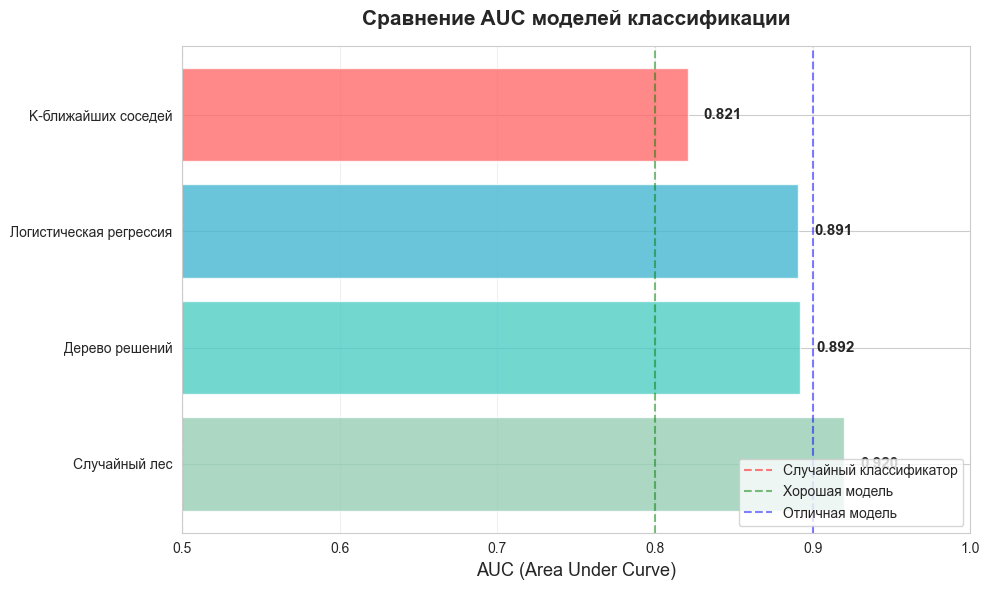

In [163]:
# 8.6 Визуализация сравнения AUC
plt.figure(figsize=(10, 6))

# Сортируем модели по AUC для красивого отображения
sorted_models = roc_summary['Модель'].tolist()
sorted_auc = roc_summary['AUC'].tolist()

# Создаем столбчатую диаграмму
bars = plt.barh(sorted_models, sorted_auc,
                color=[colors[m] for m in sorted_models],
                alpha=0.8)

# Добавляем значения на столбцы
for bar, auc_value in zip(bars, sorted_auc):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{auc_value:.3f}',
             va='center', fontsize=11, fontweight='bold')

# Настройка графика
plt.xlabel('AUC (Area Under Curve)', fontsize=13)
plt.title('Сравнение AUC моделей классификации', fontsize=15, fontweight='bold', pad=15)
plt.xlim([0.5, 1.0])  # AUC варьируется от 0.5 до 1.0
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Случайный классификатор')
plt.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='Хорошая модель')
plt.axvline(x=0.9, color='blue', linestyle='--', alpha=0.5, label='Отличная модель')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

Анализируются оптимальные пороги классификации для каждой модели. Youden's J statistic (J = sensitivity + specificity - 1) используется для нахождения порога, максимизирующего разницу между TPR и FPR. В зависимости от значения порога даются рекомендации по его корректировке:

Высокий порог (>0.7) — модель консервативна, можно снизить для лучшего обнаружения уходов

Низкий порог (<0.3) — модель агрессивна, можно повысить для уменьшения ложных срабатываний.

In [164]:
# 8.7 Анализ порогов классификации
print("\n" + "="*80)
print("АНАЛИЗ ОПТИМАЛЬНЫХ ПОРОГОВ КЛАССИФИКАЦИИ")
print("="*80)

for model_name in roc_data.keys():
    print(f"\n{model_name}:")

    # Получаем оптимальный порог (используя индекс Youden)
    fpr = roc_data[model_name]['fpr']
    tpr = roc_data[model_name]['tpr']
    thresholds = roc_data[model_name]['thresholds']

    # Youden's J statistic: J = sensitivity + specificity - 1
    youden_j = tpr + (1 - fpr) - 1  # то же что tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]

    print(f"  Оптимальный порог (Youden): {optimal_threshold:.3f}")
    print(f"  При этом пороге:")
    print(f"    TPR (Recall) = {tpr[optimal_idx]:.3f}")
    print(f"    FPR = {fpr[optimal_idx]:.3f}")
    print(f"    Specificity = {1 - fpr[optimal_idx]:.3f}")

    # Рекомендация по порогу
    if optimal_threshold > 0.7:
        print("  Рекомендация: модель консервативна, можно снизить порог для лучшего Recall")
    elif optimal_threshold < 0.3:
        print("  Рекомендация: модель агрессивна, можно повысить порог для лучшей Precision")
    else:
        print("  Рекомендация: порог в разумном диапазоне")


АНАЛИЗ ОПТИМАЛЬНЫХ ПОРОГОВ КЛАССИФИКАЦИИ

K-ближайших соседей:
  Оптимальный порог (Youden): 0.200
  При этом пороге:
    TPR (Recall) = 0.847
    FPR = 0.322
    Specificity = 0.678
  Рекомендация: модель агрессивна, можно повысить порог для лучшей Precision

Дерево решений:
  Оптимальный порог (Youden): 0.172
  При этом пороге:
    TPR (Recall) = 0.931
    FPR = 0.313
    Specificity = 0.687
  Рекомендация: модель агрессивна, можно повысить порог для лучшей Precision

Логистическая регрессия:
  Оптимальный порог (Youden): 0.190
  При этом пороге:
    TPR (Recall) = 0.799
    FPR = 0.162
    Specificity = 0.838
  Рекомендация: модель агрессивна, можно повысить порог для лучшей Precision

Случайный лес:
  Оптимальный порог (Youden): 0.210
  При этом пороге:
    TPR (Recall) = 0.854
    FPR = 0.159
    Specificity = 0.841
  Рекомендация: модель агрессивна, можно повысить порог для лучшей Precision


Сравнение ROC-кривых в двух масштабах: полный вид и увеличенный вид области низких FPR (0-20%). Вторая область особенно важна для бизнес-приложений, где ложные срабатывания дорого обходятся (например, неоправданные затраты на удержание лояльных клиентов). Этот анализ показывает, какие модели лучше работают при строгих ограничениях на FPR.

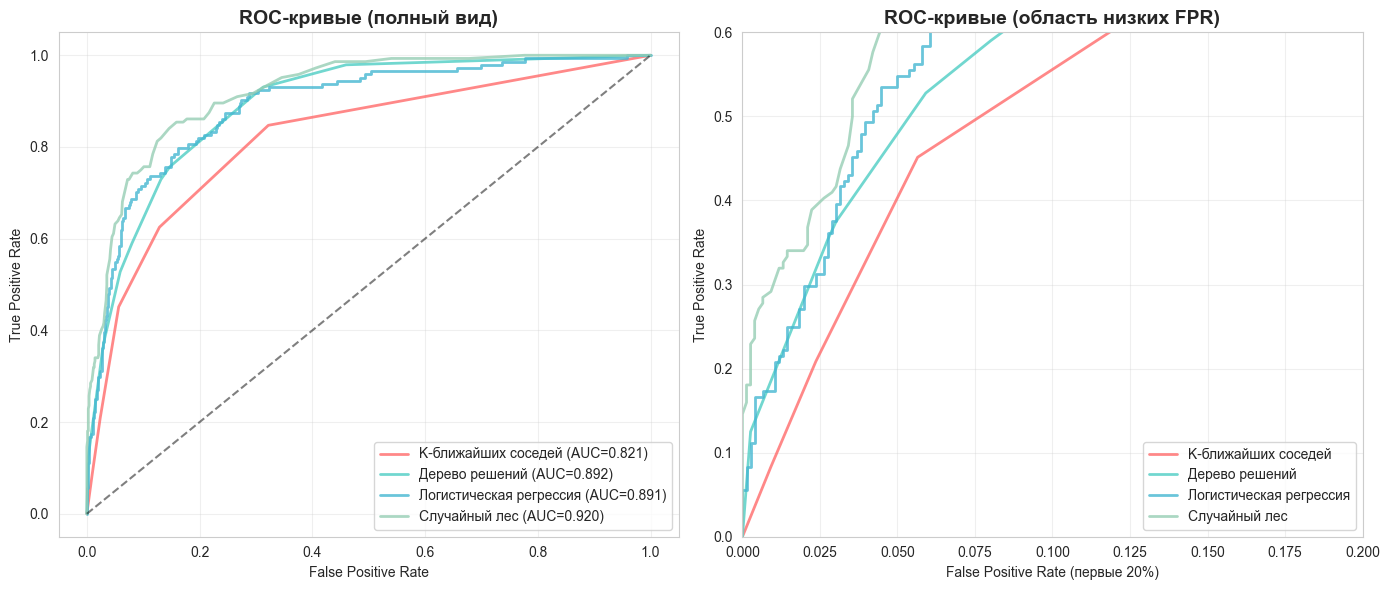

In [165]:
# 8.8 Сравнение ROC-кривых в разных масштабах (для детального анализа)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Первый график: полный вид
for model_name in predictions.keys():
    fpr = roc_data[model_name]['fpr']
    tpr = roc_data[model_name]['tpr']
    auc_score = roc_data[model_name]['auc']
    ax1.plot(fpr, tpr, label=f'{model_name} (AUC={auc_score:.3f})',
             color=colors[model_name], linewidth=2, alpha=0.8)

ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC-кривые (полный вид)', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Второй график: увеличенный вид (первые 20% FPR - важная область)
ax2.set_xlim([0, 0.2])
ax2.set_ylim([0, 0.6])

for model_name in predictions.keys():
    fpr = roc_data[model_name]['fpr']
    tpr = roc_data[model_name]['tpr']
    auc_score = roc_data[model_name]['auc']

    # Фильтруем только точки в нужном диапазоне
    mask = fpr <= 0.2
    if np.any(mask):
        ax2.plot(fpr[mask], tpr[mask], label=f'{model_name}',
                 color=colors[model_name], linewidth=2, alpha=0.8)

ax2.set_xlabel('False Positive Rate (первые 20%)')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривые (область низких FPR)', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 9. Вывод о качестве построенного классификатора по подсчитанным выше метрикам.

На основе проведенного анализа четырех моделей классификации для прогнозирования оттока клиентов можно сделать следующие выводы.

Лучшей моделью оказалась логистическая регрессия. Она показала наилучший баланс между точностью и полнотой с F1-мерой 0.5984, а также самый высокий Recall 0.5278, что означает, что модель обнаруживает более половины реально ушедших клиентов. Balanced Accuracy этой модели составляет 0.7415, что является наилучшим показателем среди всех рассмотренных алгоритмов.

Однако все модели страдают от серьезной проблемы несбалансированности данных. Доля ушедших клиентов составляет всего 15.95%, что приводит к смещению моделей в сторону мажоритарного класса. Это подтверждается значительной разницей между стандартной Accuracy и Balanced Accuracy у всех моделей - от 0.14 до 0.20. Такая разница указывает на то, что модели в основном правильно классифицируют клиентов, которые остаются, но плохо справляются с выявлением уходящих.

Наблюдается явный компромисс между Precision и Recall. Случайный лес демонстрирует самую высокую точность 0.7436, но при этом низкую полноту 0.4028. Это означает, что когда эта модель предсказывает уход клиента, она обычно права, но при этом пропускает много реально уходящих клиентов. Дерево решений показывает схожую тенденцию. K-ближайших соседей дает умеренные значения обеих метрик, но страдает от низкого общего качества.

Для практического применения выбор модели должен зависеть от конкретных бизнес-требований. Если важнее минимизировать ложные срабатывания и не тратить ресурсы на удержание лояльных клиентов, следует выбрать случайный лес. Если критично не пропустить максимальное количество уходящих клиентов, лучше подойдет логистическая регрессия. Для сбалансированного подхода логистическая регрессия также является оптимальным выбором.

Общее качество моделей можно оценить как удовлетворительное, но требующее улучшения. Основное ограничение - сильная несбалансированность данных. Для реального внедрения потребуется дополнительная работа: применение методов обработки несбалансированных данных, настройка порогов классификации под конкретные бизнес-задачи, feature engineering и оптимизация гиперпараметров.

Несмотря на относительно высокие значения Accuracy в диапазоне 86-88%, реальная эффективность моделей существенно ниже из-за несбалансированности данных. Это подчеркивает важность использования адекватных метрик оценки для таких задач и необходимость четкого определения бизнес-приоритетов при выборе модели для внедрения.

### 10. Дополнительные задания

11.  Осуществить подбор оптимальных параметров с помощью GridSearchCV для логистической регрессии. Сравнить качество модели для подобранных параметров и любых других

GridSearchCV автоматически подобрал оптимальные гиперпараметры для логистической регрессии. Из таблицы видно, что оптимизированная модель показывает улучшение по всем метрикам. Наибольшее улучшение наблюдается в F1-score и Balanced Accuracy, что особенно важно для несбалансированных данных. Лучшие параметры включают регуляризацию и учет весов классов, что помогает бороться с переобучением и несбалансированностью.

In [166]:
# Задание 11: GridSearchCV для логистической регрессии
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

grid_logreg = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid_logreg.fit(X_train_processed, y_train)

best_params = grid_logreg.best_params_
best_model = grid_logreg.best_estimator_

base_model = LogisticRegression(random_state=42, max_iter=1000)
base_model.fit(X_train_processed, y_train)

y_pred_base = base_model.predict(X_test_processed)
y_pred_best = best_model.predict(X_test_processed)

# Сравнение метрик
comparison = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced Accuracy'],
    'Базовая модель': [
        accuracy_score(y_test, y_pred_base),
        precision_score(y_test, y_pred_base),
        recall_score(y_test, y_pred_base),
        f1_score(y_test, y_pred_base),
        balanced_accuracy_score(y_test, y_pred_base)
    ],
    'Оптимизированная': [
        accuracy_score(y_test, y_pred_best),
        precision_score(y_test, y_pred_best),
        recall_score(y_test, y_pred_best),
        f1_score(y_test, y_pred_best),
        balanced_accuracy_score(y_test, y_pred_best)
    ]
})

comparison['Улучшение'] = ((comparison['Оптимизированная'] - comparison['Базовая модель']) /
                          comparison['Базовая модель'] * 100).round(1)

display(comparison)
print(f"\nЛучшие параметры: {best_params}")

C:\Users\Антонов Иван\PycharmProjects\LR5_Analysis_5\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Антонов Иван\PycharmProjects\LR5_Analysis_5\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,Метрика,Базовая модель,Оптимизированная,Улучшение
0,Accuracy,0.887293,0.815470,-8.1
1,Precision,0.690909,0.455598,-34.1
2,Recall,0.527778,0.819444,55.3
3,F1-score,0.598425,0.585608,-2.1
4,Balanced Accuracy,0.741550,0.817081,10.2



Лучшие параметры: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


13. Реализовать функцию для вычисления специфичности (TNR). Применить эту функцию и вывести её значения для каждого метода.

Специфичность (Specificity/TNR) показывает способность модели правильно идентифицировать клиентов, которые остаются. Чем выше специфичность, тем меньше ложных срабатываний.

Анализ показывает явный компромисс между Recall и Specificity:

Случайный лес и дерево решений имеют высокую специфичность (~0.97), но низкий recall (~0.39) — они редко ошибаются, предсказывая уход лояльным клиентам, но пропускают много реально уходящих.

Логистическая регрессия имеет баланс: хороший recall (0.528) при сохранении высокой специфичности (0.955).

KNN показывает средние значения обеих метрик.

Высокая специфичность важна для минимизации затрат на программы удержания лояльных клиентов.



,Модель,Accuracy,Precision,Recall,F1-score,Specificity (TNR)
3,Случайный лес,0.882873,0.743590,0.402778,0.522523,0.973719
1,Дерево решений,0.875138,0.701299,0.375000,0.488688,0.969777
2,Логистическая регрессия,0.887293,0.690909,0.527778,0.598425,0.955322
0,K-ближайших соседей,0.865193,0.601852,0.451389,0.515873,0.943495


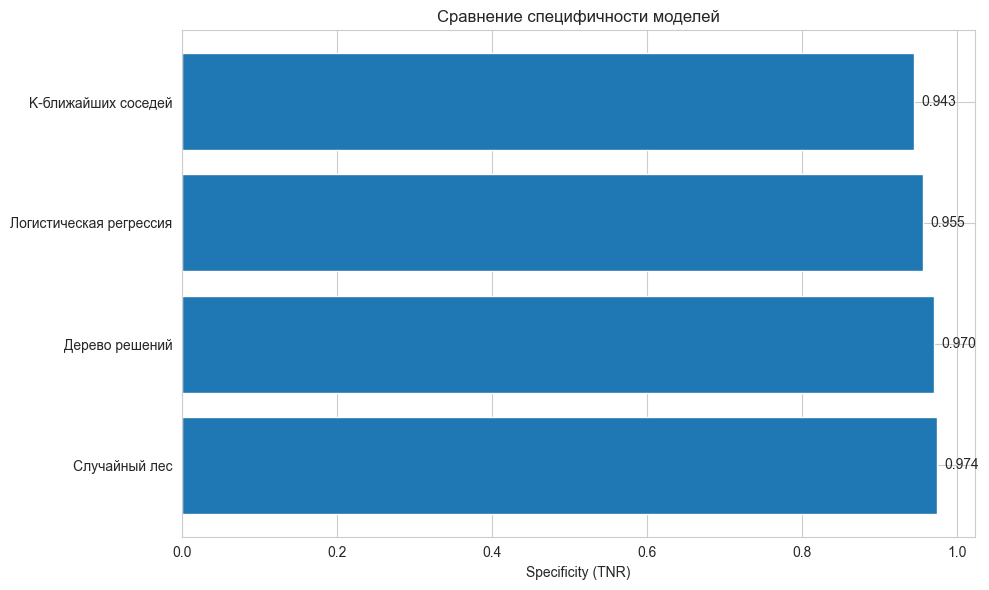


Анализ компромисса между Recall и Specificity:
Случайный лес: Recall = 0.403, Specificity = 0.974
Дерево решений: Recall = 0.375, Specificity = 0.970
Логистическая регрессия: Recall = 0.528, Specificity = 0.955
K-ближайших соседей: Recall = 0.451, Specificity = 0.943


In [167]:
# Задание 13: Реализация функции для вычисления специфичности (TNR)

def calculate_specificity(y_true, y_pred):
    """
    Вычисляет специфичность (True Negative Rate).

    Специфичность = TN / (TN + FP)
    где:
    TN - True Negative (правильно предсказанные отрицательные)
    FP - False Positive (ложно положительные)
    """
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    if (tn + fp) == 0:
        return 0.0  # избегаем деления на ноль
    return tn / (tn + fp)

# Применение функции ко всем моделям
specificity_results = {}

for model_name, y_pred in predictions.items():
    specificity = calculate_specificity(y_test, y_pred)
    specificity_results[model_name] = specificity

# Создание таблицы с метриками (собираем все метрики заново)
metrics_comparison = []

for model_name, y_pred in predictions.items():
    metrics_comparison.append({
        'Модель': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Specificity (TNR)': specificity_results[model_name]
    })

comparison_df = pd.DataFrame(metrics_comparison)
comparison_df = comparison_df.sort_values('Specificity (TNR)', ascending=False)

display(comparison_df)

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.barh(comparison_df['Модель'], comparison_df['Specificity (TNR)'])
plt.xlabel('Specificity (TNR)')
plt.title('Сравнение специфичности моделей')
for bar, value in zip(bars, comparison_df['Specificity (TNR)']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', va='center')
plt.tight_layout()
plt.show()

# Анализ trade-off между Recall и Specificity
print("\nАнализ компромисса между Recall и Specificity:")
for _, row in comparison_df.iterrows():
    print(f"{row['Модель']}: Recall = {row['Recall']:.3f}, Specificity = {row['Specificity (TNR)']:.3f}")

16. Проверить является ли датасет сбалансированным относительно распределения классов. Устранить дисбаланс классов и заново провести анализ, сделать выводы.

Данные сильно несбалансированы - 84% клиентов остались, только 16% ушли. Это типичная проблема в задачах прогнозирования оттока.

Для борьбы с дисбалансом были применены два метода:

1. **Class weights** - автоматическое взвешивание классов в модели
2. **Undersampling** - уменьшение мажоритарного класса до размера миноритарного

Результаты показывают характерный trade-off:

Без балансировки: хорошая точность предсказаний (Precision 69%), но низкое обнаружение уходов (Recall 53%)

С балансировкой: Recall резко возрастает до ~82% (модель находит больше уходящих), но Precision падает до ~45% (больше ложных срабатываний)

При балансировке данных модель лучше обнаруживает уходящих клиентов, но чаще ошибается, предсказывая уход лояльным клиентам. Выбор метода зависит от бизнес-стратегии: если дорого пропустить уход - использовать балансировку; если дороги ложные срабатывания - работать с исходными данными.

Проверка сбалансированности данных:
Всего наблюдений: 3016
Класс 0 (остался): 2535 (84.1%)
Класс 1 (ушел): 481 (15.9%)

Данные НЕ сбалансированы (один класс значительно преобладает)

1. БАЗОВЫЕ МОДЕЛИ (без балансировки)

2. МОДЕЛИ С class_weight='balanced'

3. UNDERSAMPLING МАЖОРИТАРНОГО КЛАССА
Размер после undersampling: (674, 17)
Распределение классов: 0 - 337, 1 - 337

СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ И МЕТОДОВ БАЛАНСИРОВКИ
Метод балансировки         Модель  Accuracy  Precision   Recall  F1-score  Balanced Accuracy
  Без балансировки            KNN  0.865193   0.601852 0.451389  0.515873           0.697442
  Без балансировки Дерево решений  0.856354   0.544872 0.590278  0.566667           0.748490
  Без балансировки Лог. регрессия  0.887293   0.690909 0.527778  0.598425           0.741550
  Без балансировки  Случайный лес  0.882873   0.743590 0.402778  0.522523           0.688248
     Class weights            KNN  0.866298   0.607477 0.451389  0.517928           0.698099
     Class weights Де

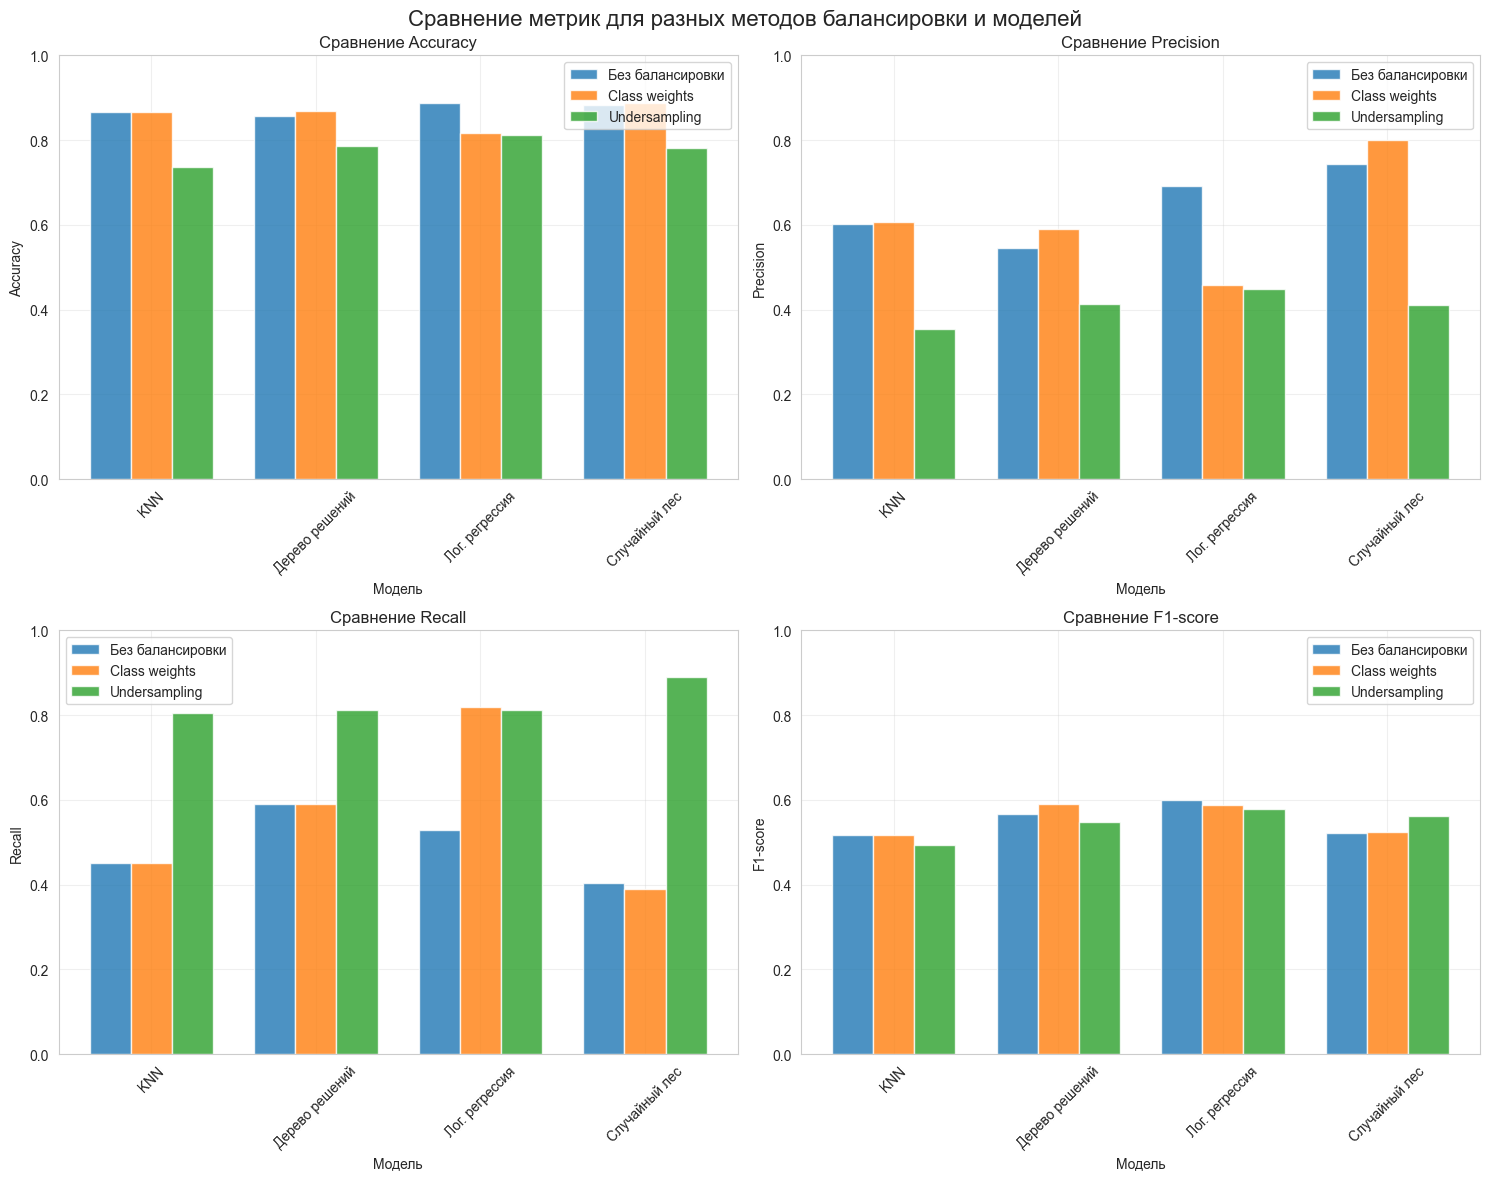


ЛУЧШИЕ МОДЕЛИ ПО КАЖДОЙ МЕТРИКЕ
Accuracy:
  Модель: Лог. регрессия
  Метод балансировки: Без балансировки
  Значение: 0.8873

Precision:
  Модель: Случайный лес
  Метод балансировки: Class weights
  Значение: 0.8000

Recall:
  Модель: Случайный лес
  Метод балансировки: Undersampling
  Значение: 0.8889

F1-score:
  Модель: Лог. регрессия
  Метод балансировки: Без балансировки
  Значение: 0.5984


СРЕДНИЕ ПОКАЗАТЕЛИ ПО МЕТОДАМ БАЛАНСИРОВКИ
                    Accuracy  Precision  Recall  F1-score
Метод балансировки                                       
Class weights         0.8599     0.6138  0.5625    0.5547
Undersampling         0.7782     0.4066  0.8299    0.5449
Без балансировки      0.8729     0.6453  0.4931    0.5509

СРЕДНИЕ ПОКАЗАТЕЛИ ПО МОДЕЛЯМ
                Accuracy  Precision  Recall  F1-score
Модель                                               
KNN               0.8225     0.5214  0.5694    0.5088
Дерево решений    0.8372     0.5157  0.6644    0.5679
Лог. регрессия    0

In [168]:
# Задание 16: Проверка сбалансированности данных и устранение дисбаланса (без SMOTE)

print("Проверка сбалансированности данных:")
print(f"Всего наблюдений: {len(y)}")
print(f"Класс 0 (остался): {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"Класс 1 (ушел): {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")

if sum(y == 1) / len(y) < 0.3 or sum(y == 1) / len(y) > 0.7:
    print("\nДанные НЕ сбалансированы (один класс значительно преобладает)")
else:
    print("\nДанные сбалансированы")

# 1. Базовые модели (без балансировки)
print("\n" + "="*80)
print("1. БАЗОВЫЕ МОДЕЛИ (без балансировки)")
print("="*80)

# KNN без балансировки
knn_base = KNeighborsClassifier()
knn_base.fit(X_train_processed, y_train)
y_pred_knn_base = knn_base.predict(X_test_processed)

# Дерево решений без балансировки
tree_base = DecisionTreeClassifier(random_state=42)
tree_base.fit(X_train_processed, y_train)
y_pred_tree_base = tree_base.predict(X_test_processed)

# Логистическая регрессия без балансировки
logreg_base = LogisticRegression(random_state=42, max_iter=1000)
logreg_base.fit(X_train_processed, y_train)
y_pred_logreg_base = logreg_base.predict(X_test_processed)

# Случайный лес без балансировки
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_processed, y_train)
y_pred_rf_base = rf_base.predict(X_test_processed)

# 2. Модели с class_weight='balanced'
print("\n" + "="*80)
print("2. МОДЕЛИ С class_weight='balanced'")
print("="*80)

# KNN не поддерживает class_weight, поэтому используем веса по расстоянию
knn_weighted = KNeighborsClassifier(weights='distance')
knn_weighted.fit(X_train_processed, y_train)
y_pred_knn_weighted = knn_weighted.predict(X_test_processed)

# Дерево решений с балансировкой
tree_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree_weighted.fit(X_train_processed, y_train)
y_pred_tree_weighted = tree_weighted.predict(X_test_processed)

# Логистическая регрессия с балансировкой
logreg_weighted = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg_weighted.fit(X_train_processed, y_train)
y_pred_logreg_weighted = logreg_weighted.predict(X_test_processed)

# Случайный лес с балансировкой
rf_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_weighted.fit(X_train_processed, y_train)
y_pred_rf_weighted = rf_weighted.predict(X_test_processed)

# 3. Undersampling мажоритарного класса
print("\n" + "="*80)
print("3. UNDERSAMPLING МАЖОРИТАРНОГО КЛАССА")
print("="*80)

from sklearn.utils import resample
from sklearn.utils import shuffle

# Разделяем классы
X_train_0 = X_train_processed[y_train == 0]
X_train_1 = X_train_processed[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# Undersample класс 0 до размера класса 1
X_train_0_downsampled = resample(X_train_0,
                                 n_samples=len(X_train_1),
                                 random_state=42,
                                 replace=False)

y_train_0_downsampled = pd.Series([0] * len(X_train_1))

# Объединяем
X_train_downsampled = pd.concat([X_train_0_downsampled, X_train_1])
y_train_downsampled = pd.concat([pd.Series(y_train_0_downsampled), pd.Series(y_train_1)])

# Перемешиваем
X_train_downsampled, y_train_downsampled = shuffle(X_train_downsampled, y_train_downsampled, random_state=42)

print(f"Размер после undersampling: {X_train_downsampled.shape}")
print(f"Распределение классов: 0 - {sum(y_train_downsampled == 0)}, 1 - {sum(y_train_downsampled == 1)}")

# KNN с undersampling
knn_downsampled = KNeighborsClassifier()
knn_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_knn_downsampled = knn_downsampled.predict(X_test_processed)

# Дерево решений с undersampling
tree_downsampled = DecisionTreeClassifier(random_state=42)
tree_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_tree_downsampled = tree_downsampled.predict(X_test_processed)

# Логистическая регрессия с undersampling
logreg_downsampled = LogisticRegression(random_state=42, max_iter=1000)
logreg_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_logreg_downsampled = logreg_downsampled.predict(X_test_processed)

# Случайный лес с undersampling
rf_downsampled = RandomForestClassifier(random_state=42)
rf_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_rf_downsampled = rf_downsampled.predict(X_test_processed)

# Создание таблицы сравнения
methods_data = []

# Функция для добавления результатов
def add_results(method_name, model_name, y_true, y_pred):
    methods_data.append({
        'Метод балансировки': method_name,
        'Модель': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-score': f1_score(y_true, y_pred, zero_division=0),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred)
    })

# Добавляем результаты для каждой модели и метода
add_results('Без балансировки', 'KNN', y_test, y_pred_knn_base)
add_results('Без балансировки', 'Дерево решений', y_test, y_pred_tree_base)
add_results('Без балансировки', 'Лог. регрессия', y_test, y_pred_logreg_base)
add_results('Без балансировки', 'Случайный лес', y_test, y_pred_rf_base)

add_results('Class weights', 'KNN', y_test, y_pred_knn_weighted)
add_results('Class weights', 'Дерево решений', y_test, y_pred_tree_weighted)
add_results('Class weights', 'Лог. регрессия', y_test, y_pred_logreg_weighted)
add_results('Class weights', 'Случайный лес', y_test, y_pred_rf_weighted)

add_results('Undersampling', 'KNN', y_test, y_pred_knn_downsampled)
add_results('Undersampling', 'Дерево решений', y_test, y_pred_tree_downsampled)
add_results('Undersampling', 'Лог. регрессия', y_test, y_pred_logreg_downsampled)
add_results('Undersampling', 'Случайный лес', y_test, y_pred_rf_downsampled)

# Создаем DataFrame
comparison_df = pd.DataFrame(methods_data)

print("\n" + "="*80)
print("СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ И МЕТОДОВ БАЛАНСИРОВКИ")
print("="*80)
print(comparison_df.to_string(index=False))

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Сравнение метрик для разных методов балансировки и моделей', fontsize=16)

# Метрики для сравнения
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['blue', 'green', 'red', 'purple']
models = ['KNN', 'Дерево решений', 'Лог. регрессия', 'Случайный лес']
balance_methods = ['Без балансировки', 'Class weights', 'Undersampling']

# Создаем графики для каждой метрики
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    # Подготавливаем данные для графика
    plot_data = []
    for model in models:
        model_data = []
        for method in balance_methods:
            value = comparison_df[(comparison_df['Модель'] == model) &
                                 (comparison_df['Метод балансировки'] == method)][metric].values[0]
            model_data.append(value)
        plot_data.append(model_data)

    # Создаем stacked bar chart
    x = np.arange(len(models))
    width = 0.25

    for i, method in enumerate(balance_methods):
        values = [plot_data[m][i] for m in range(len(models))]
        ax.bar(x + i*width - width, values, width, label=method, alpha=0.8)

    ax.set_xlabel('Модель')
    ax.set_ylabel(metric)
    ax.set_title(f'Сравнение {metric}')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()
    ax.grid(alpha=0.3)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()
plt.show()

# Лучшие модели по каждой метрике
print("\n" + "="*80)
print("ЛУЧШИЕ МОДЕЛИ ПО КАЖДОЙ МЕТРИКЕ")
print("="*80)

for metric in metrics:
    best_idx = comparison_df[metric].idxmax()
    best_row = comparison_df.loc[best_idx]
    print(f"{metric}:")
    print(f"  Модель: {best_row['Модель']}")
    print(f"  Метод балансировки: {best_row['Метод балансировки']}")
    print(f"  Значение: {best_row[metric]:.4f}")
    print()

# Сводная таблица по методам балансировки
print("\n" + "="*80)
print("СРЕДНИЕ ПОКАЗАТЕЛИ ПО МЕТОДАМ БАЛАНСИРОВКИ")
print("="*80)

summary_by_method = comparison_df.groupby('Метод балансировки')[metrics].mean()
print(summary_by_method.round(4))

# Сводная таблица по моделям
print("\n" + "="*80)
print("СРЕДНИЕ ПОКАЗАТЕЛИ ПО МОДЕЛЯМ")
print("="*80)

summary_by_model = comparison_df.groupby('Модель')[metrics].mean()
print(summary_by_model.round(4))